# Número do Trabalho / Grupo: 3
# Trabalho de ME323 - Arquivo com Códigos

**Integrantes do grupo / RAs:**
    
    - Arthur Lucas Da Silva Nogueira / 213293
    
    - Maria Giulia Martins / 202819
    
    - Marilia Correa Da Silva Santos / 221936
    
    - Yuri Alexandre Okida Sato / 225974

# Bibliotecas Utilizadas

In [211]:
#biblioteca para ler os arquivos csv do drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [212]:
#bibliotecas para fazer as análises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Funções Utilizadas
## Teste de Hipótese

In [213]:
def hip_test(sub_fora, sub_dentro):
  '''
  Função que aplica testes de hipóteses comumente utilizados.
  Input: subconjunto externo e subconjunto interno
  Output: p-valores e o resultados dos testes
  '''

  p_value1 = -1

  if len(sub_fora) > 0 and len(sub_dentro) > 0:
    print('* Mann-Whitney:')
    try:
      u_statistic1, p_value1 = scipy.stats.mannwhitneyu(sub_fora,sub_dentro, alternative = 'two-sided')
      print('     -> mannwhitneyu: U-statistic = %f\tp_value = %f' %(u_statistic1, p_value1))
    except ValueError: 
      print("     -> ValueError: Todos os números são idênticos no teste de mannwhitneyu, então o desconsideraremos")
    u_statistic2, p_value2 = scipy.stats.ranksums(sub_fora,sub_dentro)
    print('     -> ranksums: U-statistic = %f\tp_value = %f\n' %(u_statistic2, p_value2))

    print("* Two Sample Kolmogorov-Smirnov:")
    u_statistic3, p_value3 = scipy.stats.ks_2samp(sub_fora ,sub_dentro ,alternative='two-sided')
    print(f'     -> p_value = {p_value3}')

    if (p_value1 < 0.05 and p_value1 != -1) or (p_value2 < 0.05) or (p_value3 < 0.05):
      print("\n\n* Possível rejeitar a hipótese nula de acordo com: ")
      if (p_value1 < 0.05) or (p_value2 < 0.05):
        print("  - Mann-Whitney-U Test: ")
        if (p_value1 < 0.05):
          print("     -> mannwhitneyu")
        if (p_value2 < 0.05):
          print("     -> ranksums")
      if (p_value3 < 0.05):
        print("  - Two Sampe Kolmogorov-Smirnov Test")
    else:
      print("\n\nNão há significância estatística para rejeitar a hipótese nula")
  else:
    print("Não há dados suficientes para o cálculo dos testes de Hipótese")

# Lendo os arquivos
    - dados_grupo_3_comp_A.csv
    - dados_grupo_3_Incremento_salario_comp_A.csv
    - dados_grupo_3_comp_B.csv
    - dados_grupo_3_Incremento_salario_comp_A.csv

Todos os arquivos estão disponíveis na seguinte pasta: https://drive.google.com/drive/folders/1cLnwTMDnMT9rrvxP40v8sumInG9Tbs3c?usp=sharing

In [214]:
dadosA = pd.read_csv('/content/drive/MyDrive/ME323 - Trabalho/dados_grupo_3_comp_A.csv')
salarioA = pd.read_csv('/content/drive/MyDrive/ME323 - Trabalho/dados_grupo_3_Incremento_salario_comp_A.csv')
dadosB = pd.read_csv('/content/drive/MyDrive/ME323 - Trabalho/dados_grupo_3_comp_B.csv')
salarioB = pd.read_csv('/content/drive/MyDrive/ME323 - Trabalho/dados_grupo_3_Incremento_salario_comp_B.csv')

# $1ª\ Parte:$

## $1.i)$ Classifique as variáveis por tipo

### dados_grupo_3_comp_A.csv

In [215]:
dadosA.head()

,Unnamed: 0,Sexo,Educ,cargo,Sal
0,1,masc,sec,outro,8.92
1,2,fem,sec,outro,9.63
2,3,masc,prim,outro,5.29
3,4,masc,sec,outro,8.11
4,5,masc,prim,outro,4.43


Tipos de variáveis de dados_grupo_3_comp_A.csv
    
     _______________________________
    |Variável|         Tipo         |
    |--------|----------------------|
    |  Sexo  | Qualitativa Nominal  |
    |  Educ  | Qualitativa Ordinal  |
    |  cargo | Qualitativa Nominal  |
    |  Sal   | Quantitativa Contínua|
     ⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻

### dados_grupo_3_Incremento_salario_comp_A.csv

In [216]:
salarioA.head()

,Unnamed: 0,Indicador incremento salario real
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


Tipos de variáveis de dados_grupo_3_Incremento_salario_comp_A.csv
    
     ____________________________________
    |      Variável      |     Tipo      |
    |--------------------|---------------|
    |Indicador incremento|  Qualitativa  |
    |   salário real     |    Nominal    |
     ⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻

### dados_grupo_3_comp_B.csv

In [217]:
dadosB.head()

,Unnamed: 0,Sexo,Educ,cargo,Sal
0,1,masc,prim,outro,4.27
1,2,fem,sec,outro,6.90
2,3,fem,prim,outro,1.33
3,4,fem,sec,outro,3.23
4,5,masc,sec,outro,8.31


Tipos de variáveis de dados_grupo_3_comp_B.csv
    
     _______________________________
    |Variável|         Tipo         |
    |--------|----------------------|
    |  Sexo  | Qualitativa Nominal  |
    |  Educ  | Qualitativa Ordinal  |
    |  cargo | Qualitativa Nominal  |
    |  Sal   | Quantitativa Contínua|
     ⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻

### dados_grupo_3_Incremento_salario_comp_B.csv

In [218]:
salarioB.head()

,Unnamed: 0,Indicador incremento salario real
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1


Tipos de variáveis de dados_grupo_3_Incremento_salario_comp_B.csv
    
     ____________________________________
    |      Variável      |     Tipo      |
    |--------------------|---------------|
    |Indicador incremento|  Qualitativa  |
    |   salário real     |    Nominal    |
     ⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻⁻

## $1.ii)$ Apresente uma tabela de distribuição de frequências para cada variável

### dados_grupo_3_comp_A.csv

In [219]:
sexA = pd.DataFrame(dadosA['Sexo'].value_counts())
sexA['Proporção (f_i)'] = sexA['Sexo']/sexA['Sexo'].sum()
sexA['%(100×f_i)'] = sexA['Sexo']/sexA['Sexo'].sum()*100
sexA['%(100×f_i)'] = round(sexA['%(100×f_i)'], 2)
sexA = sexA.rename(columns = {'index':'Sexo', 'Sexo':'Frequência (n_i)'})
sexA

,Frequência (n_i),Proporção (f_i),%(100×f_i)
masc,142,0.572581,57.26
fem,106,0.427419,42.74


In [220]:
educA = pd.DataFrame(dadosA['Educ'].value_counts())
educA['Proporção (f_i)'] = educA['Educ']/educA['Educ'].sum()
educA['%(100×f_i)'] = educA['Educ']/educA['Educ'].sum()*100
educA['%(100×f_i)'] = round(educA['%(100×f_i)'], 2)
educA = educA.rename(columns = {'index':'Educ', 'Educ':'Frequência (n_i)'})
educA

,Frequência (n_i),Proporção (f_i),%(100×f_i)
sec,114,0.459677,45.97
prim,103,0.415323,41.53
terc,31,0.125000,12.50


In [221]:
cargoA = pd.DataFrame(dadosA['cargo'].value_counts())
cargoA['Proporção (f_i)'] = cargoA['cargo']/cargoA['cargo'].sum()
cargoA['%(100×f_i)'] = cargoA['cargo']/cargoA['cargo'].sum()*100
cargoA['%(100×f_i)'] = round(cargoA['%(100×f_i)'], 2)
cargoA = cargoA.rename(columns = {'index':'cargo', 'cargo':'Frequência (n_i)'})
cargoA

,Frequência (n_i),Proporção (f_i),%(100×f_i)
outro,211,0.850806,85.08
gerencial,37,0.149194,14.92


In [222]:
print("Menor salário:", dadosA['Sal'].min()) #menor salário do banco == 0.56
print("Maior salário:", dadosA['Sal'].max()) #maior salário do banco == 24.76

#divisão salarial com base em intervalos de 5 reais
sA0_5 = dadosA[dadosA['Sal'].astype(float) <= 5.0] #de 0 a 5

sA6_10 = dadosA[dadosA['Sal'].astype(float) > 5.0] #maior que 5
sA6_10 = sA6_10[sA6_10['Sal'].astype(float) <= 10.0] #menor igual 10

sA11_15 = dadosA[dadosA['Sal'].astype(float) > 10] #maior que 10
sA11_15 = sA11_15[sA11_15['Sal'].astype(float) <= 15] #menor igual 15

sA16_20 = dadosA[dadosA['Sal'].astype(float) > 15] #maior que 15
sA16_20 = sA16_20[sA16_20['Sal'].astype(float) <= 20] #menor igual 20

sA21_25 = dadosA[dadosA['Sal'].astype(float) > 20] #maior que 20

totalA = len(dadosA[dadosA['Sal'].astype(float) <= 5.0]) + len(sA6_10) + len(sA11_15) + len(sA16_20) + len(sA21_25)

dict_salariosA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Frequência (n_i)': [len(sA0_5), 
                                       len(sA6_10), 
                                       len(sA11_15), 
                                       len(sA16_20), 
                                       len(sA21_25)],
                  'Proporção (f_i)' : [len(dadosA[dadosA['Sal'].astype(float) <= 5.0])/totalA, 
                                       len(sA6_10)/totalA, 
                                       len(sA11_15)/totalA, 
                                       len(sA16_20)/totalA, 
                                       len(sA21_25)/totalA],
                  '%(100×f_i)': [round((len(dadosA[dadosA['Sal'].astype(float) <= 5.0])*100/totalA), 4), 
                                 round((len(sA6_10)*100/totalA), 4), 
                                 round((len(sA11_15)*100/totalA), 4), 
                                 round((len(sA16_20)*100/totalA), 4), 
                                 round((len(sA21_25)*100/totalA), 4)]
                }
salA = pd.DataFrame(dict_salariosA)
salA

Menor salário: 0.56
Maior salário: 24.76


,Faixas Salariais,Frequência (n_i),Proporção (f_i),%(100×f_i)
0,Salários de 0 a 5,62,0.250000,25.0000
1,Salários de 5 a 10,128,0.516129,51.6129
2,Salários de 10 a 15,21,0.084677,8.4677
3,Salários de 15 a 20,14,0.056452,5.6452
4,Salários de 20 a 25,23,0.092742,9.2742


### dados_grupo_3_Incremento_salario_comp_A.csv

In [223]:
sA = pd.DataFrame(salarioA['Indicador incremento salario real'].value_counts())
sA['Proporção (f_i)'] = sA['Indicador incremento salario real']/sA['Indicador incremento salario real'].sum()
sA['%(100×f_i)'] = sA['Indicador incremento salario real']/sA['Indicador incremento salario real'].sum()*100
sA['%(100×f_i)'] = round(sA['%(100×f_i)'], 2)
sA = sA.rename(columns = {'index':'Indicador incremento salario real', 'Indicador incremento salario real':'Frequência (n_i)'})
sA

,Frequência (n_i),Proporção (f_i),%(100×f_i)
0,489,0.507788,50.78
1,474,0.492212,49.22


### dados_grupo_3_comp_B.csv

In [224]:
sexB = pd.DataFrame(dadosB['Sexo'].value_counts())
sexB['Proporção (f_i)'] = sexB['Sexo']/sexB['Sexo'].sum()
sexB['%(100×f_i)'] = sexB['Sexo']/sexB['Sexo'].sum()*100
sexB['%(100×f_i)'] = round(sexB['%(100×f_i)'], 2)
sexB = sexB.rename(columns = {'index':'Sexo', 'Sexo':'Frequência (n_i)'})
sexB

,Frequência (n_i),Proporção (f_i),%(100×f_i)
fem,143,0.55642,55.64
masc,114,0.44358,44.36


In [225]:
educB = pd.DataFrame(dadosB['Educ'].value_counts())
educB['Proporção (f_i)'] = educB['Educ']/educB['Educ'].sum()
educB['%(100×f_i)'] = educB['Educ']/educB['Educ'].sum()*100
educB['%(100×f_i)'] = round(educB['%(100×f_i)'], 2)
educB = educB.rename(columns = {'index':'Educ', 'Educ':'Frequência (n_i)'})
educB

,Frequência (n_i),Proporção (f_i),%(100×f_i)
sec,127,0.494163,49.42
prim,97,0.377432,37.74
terc,33,0.128405,12.84


In [226]:
cargoB = pd.DataFrame(dadosB['cargo'].value_counts())
cargoB['Proporção (f_i)'] = cargoB['cargo']/cargoB['cargo'].sum()
cargoB['%(100×f_i)'] = cargoB['cargo']/cargoB['cargo'].sum()*100
cargoB['%(100×f_i)'] = round(cargoB['%(100×f_i)'], 2)
cargoB = cargoB.rename(columns = {'index':'cargo', 'cargo':'Frequência (n_i)'})
cargoB

,Frequência (n_i),Proporção (f_i),%(100×f_i)
outro,220,0.856031,85.6
gerencial,37,0.143969,14.4


In [227]:
print("Menor salário:", dadosB['Sal'].min()) #menor salário do banco == 0.56
print("Maior salário:", dadosB['Sal'].max()) #maior salário do banco == 24.76

#divisão salarial com base em intervalos de 5 reais
s0_5 = dadosB[dadosB['Sal'].astype(int) <= 5] #de 0 a 5

s6_10 = dadosB[dadosB['Sal'].astype(int) > 5] #maior que 5
s6_10 = s6_10[s6_10['Sal'].astype(int) <= 10] #menor igual 10

s11_15 = dadosB[dadosB['Sal'].astype(int) > 10] #maior que 10
s11_15 = s11_15[s11_15['Sal'].astype(int) <= 15] #menor igual 15

s16_20 = dadosB[dadosB['Sal'].astype(int) > 15] #maior que 15
s16_20 = s16_20[s16_20['Sal'].astype(int) <= 20] #menor igual 20

s21_25 = dadosB[dadosB['Sal'].astype(int) > 20] #maior que 20
s21_25 = s21_25[s21_25['Sal'].astype(int) <= 25] #menor igual 25

totalB = len(s0_5) + len(s6_10) + len(s11_15) + len(s16_20) + len(s21_25)
dict_salariosB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Frequência (n_i)': [len(s0_5), len(s6_10), len(s11_15), len(s16_20), len(s21_25)],
                  'Proporção (f_i)' : [len(s0_5)/totalB, len(s6_10)/totalB, len(s11_15)/totalB, len(s16_20)/totalB, len(s21_25)/totalB],
                  '%(100×f_i)': [round((len(s0_5)*100/totalB), 4), round((len(s6_10)*100/totalB), 4), round((len(s11_15)*100/totalB), 4), 
                                 round((len(s16_20)*100/totalB), 4), round((len(s21_25)*100/totalB), 4)]
                }
salB = pd.DataFrame(dict_salariosB)
salB

Menor salário: 0.61
Maior salário: 23.56


,Faixas Salariais,Frequência (n_i),Proporção (f_i),%(100×f_i)
0,Salários de 0 a 5,92,0.357977,35.7977
1,Salários de 5 a 10,106,0.412451,41.2451
2,Salários de 10 a 15,47,0.182879,18.2879
3,Salários de 15 a 20,8,0.031128,3.1128
4,Salários de 20 a 25,4,0.015564,1.5564


### dados_grupo_3_Incremento_salario_comp_B.csv

In [228]:
sB = pd.DataFrame(salarioB['Indicador incremento salario real'].value_counts())
sB['Proporção (f_i)'] = sB['Indicador incremento salario real']/sB['Indicador incremento salario real'].sum()
sB['%(100×f_i)'] = sB['Indicador incremento salario real']/sB['Indicador incremento salario real'].sum()*100
sB['%(100×f_i)'] = round(sB['%(100×f_i)'], 2)
sB = sB.rename(columns = {'index':'Indicador incremento salario real', 'Indicador incremento salario real':'Frequência (n_i)'})
sB

,Frequência (n_i),Proporção (f_i),%(100×f_i)
1,514,0.5261,52.61
0,463,0.4739,47.39


## $1.iii)$ Apresente um gráfico de distribuição de frequências para cada variável.

### dados_grupo_3_comp_A.csv

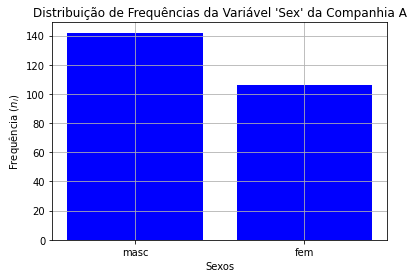

In [229]:
plt.bar(sexA.index, list(sexA['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Sex' da Companhia A")
plt.xlabel("Sexos")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

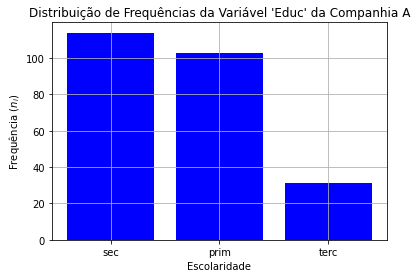

In [230]:
plt.bar(educA.index, list(educA['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Educ' da Companhia A")
plt.xlabel("Escolaridade")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

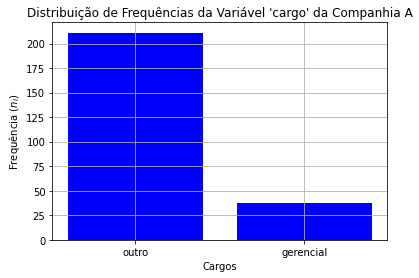

In [231]:
plt.bar(cargoA.index, list(cargoA['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'cargo' da Companhia A")
plt.xlabel("Cargos")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

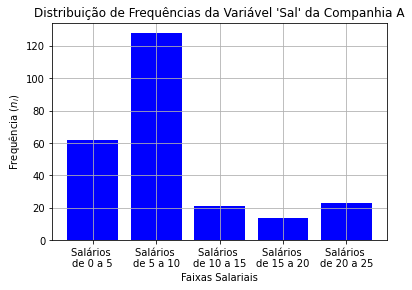

In [232]:
plt.bar(['Salários \nde 0 a 5', 'Salários \nde 5 a 10', 'Salários \nde 10 a 15', 'Salários \nde 15 a 20', 'Salários \nde 20 a 25'], list(salA['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Sal' da Companhia A")
plt.xlabel("Faixas Salariais")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

### dados_grupo_3_Incremento_salario_comp_A.csv

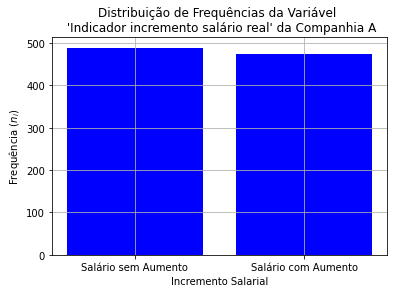

In [233]:
plt.bar(['Salário sem Aumento', 'Salário com Aumento'], list(sA['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável \n 'Indicador incremento salário real' da Companhia A")
plt.xlabel("Incremento Salarial")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

### dados_grupo_3_comp_B.csv

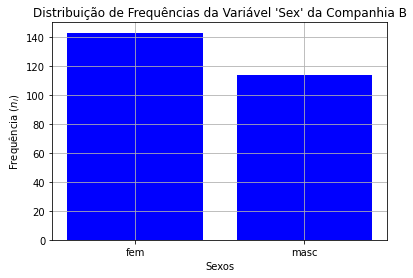

In [234]:
plt.bar(sexB.index, list(sexB['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Sex' da Companhia B")
plt.xlabel("Sexos")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

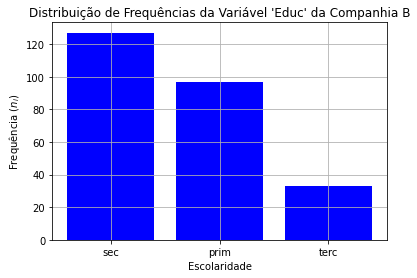

In [235]:
plt.bar(educB.index, list(educB['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Educ' da Companhia B")
plt.xlabel("Escolaridade")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

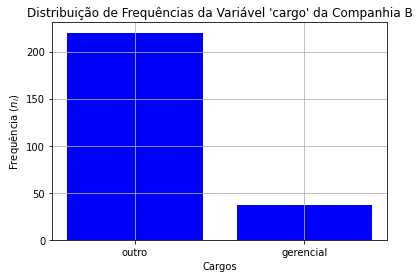

In [236]:
plt.bar(cargoB.index, list(cargoB['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'cargo' da Companhia B")
plt.xlabel("Cargos")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

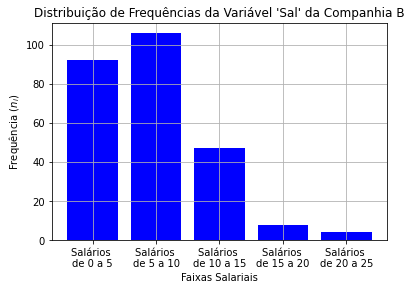

In [237]:
plt.bar(['Salários \nde 0 a 5', 'Salários \nde 5 a 10', 'Salários \nde 10 a 15', 'Salários \nde 15 a 20', 'Salários \nde 20 a 25'], list(salB['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável 'Sal' da Companhia B")
plt.xlabel("Faixas Salariais")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

### dados_grupo_3_Incremento_salario_comp_B.csv

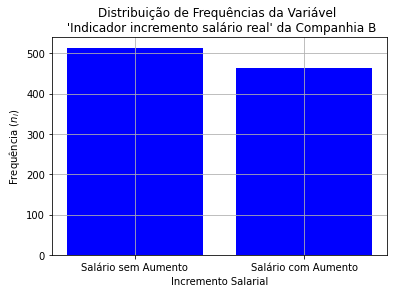

In [238]:
plt.bar(['Salário sem Aumento', 'Salário com Aumento'], list(sB['Frequência (n_i)']), color = 'blue')
plt.title("Distribuição de Frequências da Variável \n 'Indicador incremento salário real' da Companhia B")
plt.xlabel("Incremento Salarial")
plt.ylabel("Frequência ($n_i$)")
plt.grid()
plt.show()

## $1.iv)$ Apresente um boxplot para a variável salário.


### Companhia A

count    248.000000
mean       8.826411
std        5.723983
min        0.560000
25%        5.015000
50%        7.300000
75%        9.870000
max       24.760000
Name: Sal, dtype: float64


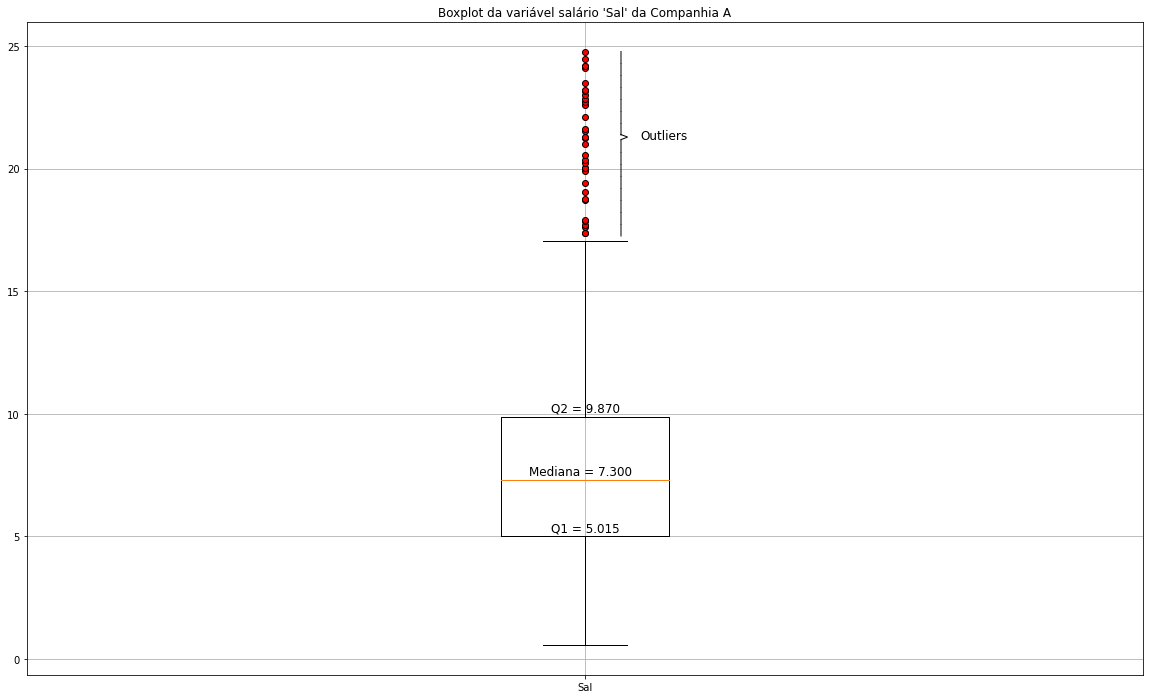

In [239]:
dados_sal_A = (pd.Series(dadosA['Sal'])).sort_values()
print(dados_sal_A.describe())
green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(dados_sal_A, flierprops=green_diamond)
plt.title("Boxplot da variável salário 'Sal' da Companhia A")
plt.xticks([1],["Sal"])
plt.grid()
plt.text(0.95, 7.5, 'Mediana = 7.300', fontsize = 12)
plt.text(0.97, 5.2, 'Q1 = 5.015', fontsize = 12)
plt.text(0.97, 10.1, 'Q2 = 9.870', fontsize = 12)
plt.text(1.05, 21.2, 'Outliers', fontsize = 12)
plt.text(1.03, 24.44, '|', fontsize = 12)
plt.text(1.03, 23.95, '|', fontsize = 12)
plt.text(1.03, 23.46, '|', fontsize = 12)
plt.text(1.03, 22.97, '|', fontsize = 12)
plt.text(1.03, 22.48, '|', fontsize = 12)
plt.text(1.03, 21.99, '|', fontsize = 12)
plt.text(1.03, 21.5, '|', fontsize = 12)
plt.text(1.03, 21.2, '>', fontsize = 12)
plt.text(1.03, 20.83, '|', fontsize = 12)
plt.text(1.03, 20.34, '|', fontsize = 12)
plt.text(1.03, 19.85, '|', fontsize = 12)
plt.text(1.03, 19.36, '|', fontsize = 12)
plt.text(1.03, 18.87, '|', fontsize = 12)
plt.text(1.03, 18.38, '|', fontsize = 12)
plt.text(1.03, 17.89, '|', fontsize = 12)
plt.text(1.03, 17.4, '|', fontsize = 12)
plt.show()

### Companhia B

count    257.000000
mean       8.077626
std        4.539631
min        0.610000
25%        4.480000
50%        7.730000
75%       10.620000
max       23.560000
Name: Sal, dtype: float64


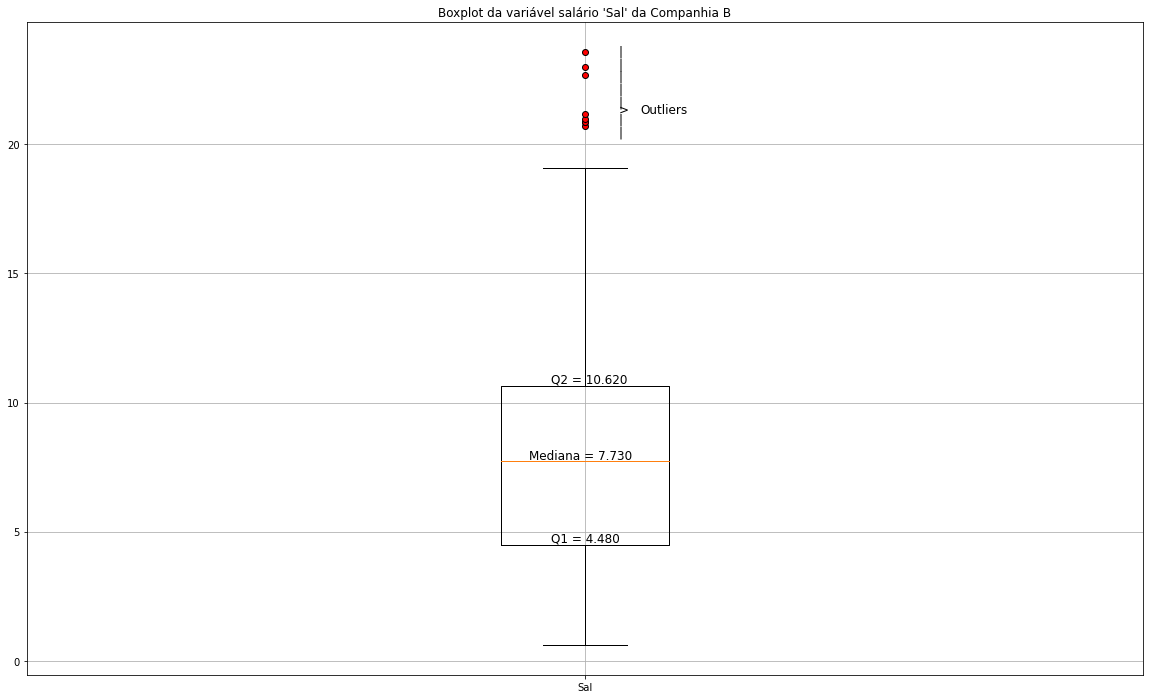

In [240]:
dados_sal_B = (pd.Series(dadosB['Sal'])).sort_values()
print(dados_sal_B.describe())
green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(dados_sal_B, flierprops=green_diamond)
plt.title("Boxplot da variável salário 'Sal' da Companhia B")
plt.xticks([1],["Sal"])
plt.grid()
plt.text(0.95, 7.8, 'Mediana = 7.730', fontsize = 12)
plt.text(0.97, 4.6, 'Q1 = 4.480', fontsize = 12)
plt.text(0.97, 10.75, 'Q2 = 10.620', fontsize = 12)
plt.text(1.05, 21.2, 'Outliers', fontsize = 12)
plt.text(1.03, 23.46, '|', fontsize = 12)
plt.text(1.03, 22.97, '|', fontsize = 12)
plt.text(1.03, 22.48, '|', fontsize = 12)
plt.text(1.03, 21.99, '|', fontsize = 12)
plt.text(1.03, 21.5, '|', fontsize = 12)
plt.text(1.03, 21.2, '>', fontsize = 12)
plt.text(1.03, 20.83, '|', fontsize = 12)
plt.text(1.03, 20.34, '|', fontsize = 12)
plt.show()

# $2ª\ Parte:$ Para cada companhia, analise a dependência entre as variáveis

## $2.i)$ Analise a dependência entre as variáveis sexo e educação

###Companhia A

**Distribuição Conjunta**

In [241]:
corrSexEducA = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino': [dadosA.query("Educ == 'prim' and Sexo == 'masc'").shape[0],
                                dadosA.query("Educ == 'sec' and Sexo == 'masc'").shape[0],
                                dadosA.query("Educ == 'terc' and Sexo == 'masc'").shape[0],
                                sexA['Frequência (n_i)'][0]
                   ],
                  'Feminino' : [dadosA.query("Educ == 'prim' and Sexo == 'fem'").shape[0],
                                dadosA.query("Educ == 'sec' and Sexo == 'fem'").shape[0],
                                dadosA.query("Educ == 'terc' and Sexo == 'fem'").shape[0],
                                sexA['Frequência (n_i)'][1]
                   ],
                  'Total': [educA['Frequência (n_i)'][1], 
                            educA['Frequência (n_i)'][0], 
                            educA['Frequência (n_i)'][2], 
                            sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1]
                   ],
                }
distConjuntaSexEducA = pd.DataFrame(corrSexEducA)
distConjuntaSexEducA

,Educação,Masculino,Feminino,Total
0,prim,50,53,103
1,sec,71,43,114
2,terc,21,10,31
3,Total,142,106,248


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [242]:
corrSexEducA = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino (%)': [dadosA.query("Educ == 'prim' and Sexo == 'masc'").shape[0]/sexA['Frequência (n_i)'][0]*100,
                                dadosA.query("Educ == 'sec' and Sexo == 'masc'").shape[0]/sexA['Frequência (n_i)'][0]*100,
                                dadosA.query("Educ == 'terc' and Sexo == 'masc'").shape[0]/sexA['Frequência (n_i)'][0]*100,
                                sexA['Frequência (n_i)'][0]/sexA['Frequência (n_i)'][0]*100
                   ],
                  'Feminino (%)' : [dadosA.query("Educ == 'prim' and Sexo == 'fem'").shape[0]/sexA['Frequência (n_i)'][1]*100,
                                dadosA.query("Educ == 'sec' and Sexo == 'fem'").shape[0]/sexA['Frequência (n_i)'][1]*100,
                                dadosA.query("Educ == 'terc' and Sexo == 'fem'").shape[0]/sexA['Frequência (n_i)'][1]*100,
                                sexA['Frequência (n_i)'][1]/sexA['Frequência (n_i)'][1]*100
                   ],
                  'Total (%)': [educA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100, 
                            educA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100, 
                            educA['Frequência (n_i)'][2]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100, 
                            (sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                }
distRelColSexEducA = pd.DataFrame(corrSexEducA)
distRelColSexEducA.round(1)

,Educação,Masculino (%),Feminino (%),Total (%)
0,prim,35.2,50.0,41.5
1,sec,50.0,40.6,46.0
2,terc,14.8,9.4,12.5
3,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [243]:
corrSexEducA = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino (%)': [dadosA.query("Educ == 'prim' and Sexo == 'masc'").shape[0]/educA['Frequência (n_i)'][1]*100,
                                dadosA.query("Educ == 'sec' and Sexo == 'masc'").shape[0]/educA['Frequência (n_i)'][0]*100,
                                dadosA.query("Educ == 'terc' and Sexo == 'masc'").shape[0]/educA['Frequência (n_i)'][2]*100,
                                sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                  'Feminino (%)' : [dadosA.query("Educ == 'prim' and Sexo == 'fem'").shape[0]/educA['Frequência (n_i)'][1]*100,
                                dadosA.query("Educ == 'sec' and Sexo == 'fem'").shape[0]/educA['Frequência (n_i)'][0]*100,
                                dadosA.query("Educ == 'terc' and Sexo == 'fem'").shape[0]/educA['Frequência (n_i)'][2]*100,
                                sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                  'Total (%)': [educA['Frequência (n_i)'][1]/educA['Frequência (n_i)'][1]*100, 
                            educA['Frequência (n_i)'][0]/educA['Frequência (n_i)'][0]*100, 
                            educA['Frequência (n_i)'][2]/educA['Frequência (n_i)'][2]*100, 
                            (sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                }
distRelLinhaSexEducA = pd.DataFrame(corrSexEducA)
distRelLinhaSexEducA.round(1)

,Educação,Masculino (%),Feminino (%),Total (%)
0,prim,48.5,51.5,100.0
1,sec,62.3,37.7,100.0
2,terc,67.7,32.3,100.0
3,Total,57.3,42.7,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [244]:
corrSexEducA = {'Educação': ['prim', 'sec', 'terc'],
                  'Masculino': [educA['Frequência (n_i)'][1]*sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1]),
                                educA['Frequência (n_i)'][0]*sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1]),
                                educA['Frequência (n_i)'][2]*sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])
                   ],
                  'Feminino' : [sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*educA['Frequência (n_i)'][1],
                                sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*educA['Frequência (n_i)'][0],
                                sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*educA['Frequência (n_i)'][2]
                   ],
                }
distEsperadaSexEducA = pd.DataFrame(corrSexEducA)
distEsperadaSexEducA.round(1)

,Educação,Masculino,Feminino
0,prim,59.0,44.0
1,sec,65.3,48.7
2,terc,17.8,13.2


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [245]:
corrSexEducA = {'Educação': ['prim', 'sec', 'terc'],
                  'Masculino': [((distConjuntaSexEducA['Masculino'][0]-distEsperadaSexEducA['Masculino'][0])**2)/distEsperadaSexEducA['Masculino'][0],
                                ((distConjuntaSexEducA['Masculino'][1]-distEsperadaSexEducA['Masculino'][1])**2)/distEsperadaSexEducA['Masculino'][1],
                                ((distConjuntaSexEducA['Masculino'][2]-distEsperadaSexEducA['Masculino'][2])**2)/distEsperadaSexEducA['Masculino'][2]
                   ],
                  'Feminino' : [((distConjuntaSexEducA['Feminino'][0]-distEsperadaSexEducA['Feminino'][0])**2)/distEsperadaSexEducA['Feminino'][0],
                                ((distConjuntaSexEducA['Feminino'][1]-distEsperadaSexEducA['Feminino'][1])**2)/distEsperadaSexEducA['Feminino'][1],
                                ((distConjuntaSexEducA['Feminino'][2]-distEsperadaSexEducA['Feminino'][2])**2)/distEsperadaSexEducA['Feminino'][2]
                   ],
                }
esp = pd.DataFrame(corrSexEducA)
X_quadrado = esp['Masculino'][0]+esp['Masculino'][1]+esp['Masculino'][2]+esp['Feminino'][0]+esp['Feminino'][1]+esp['Feminino'][2]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 5.763436970424404


,Educação,Masculino,Feminino
0,prim,1.366070,1.830019
1,sec,0.502264,0.672844
2,terc,0.595070,0.797170


### Companhia B

**Distribuição Conjunta**

In [246]:
corrSexEducB = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino': [dadosB.query("Educ == 'prim' and Sexo == 'masc'").shape[0],
                                dadosB.query("Educ == 'sec' and Sexo == 'masc'").shape[0],
                                dadosB.query("Educ == 'terc' and Sexo == 'masc'").shape[0],
                                sexB['Frequência (n_i)'][0]
                   ],
                  'Feminino' : [dadosB.query("Educ == 'prim' and Sexo == 'fem'").shape[0],
                                dadosB.query("Educ == 'sec' and Sexo == 'fem'").shape[0],
                                dadosB.query("Educ == 'terc' and Sexo == 'fem'").shape[0],
                                sexB['Frequência (n_i)'][1]
                   ],
                  'Total': [educB['Frequência (n_i)'][1], 
                            educB['Frequência (n_i)'][0], 
                            educB['Frequência (n_i)'][2], 
                            sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1]
                   ],
                }
distConjuntaSexEducB = pd.DataFrame(corrSexEducB)
distConjuntaSexEducB

,Educação,Masculino,Feminino,Total
0,prim,42,55,97
1,sec,58,69,127
2,terc,14,19,33
3,Total,143,114,257


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [247]:
corrSexEducB = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino (%)': [dadosB.query("Educ == 'prim' and Sexo == 'masc'").shape[0]/sexB['Frequência (n_i)'][0]*100,
                                dadosB.query("Educ == 'sec' and Sexo == 'masc'").shape[0]/sexB['Frequência (n_i)'][0]*100,
                                dadosB.query("Educ == 'terc' and Sexo == 'masc'").shape[0]/sexB['Frequência (n_i)'][0]*100,
                                sexB['Frequência (n_i)'][0]/sexB['Frequência (n_i)'][0]*100
                   ],
                  'Feminino (%)' : [dadosB.query("Educ == 'prim' and Sexo == 'fem'").shape[0]/sexB['Frequência (n_i)'][1]*100,
                                dadosB.query("Educ == 'sec' and Sexo == 'fem'").shape[0]/sexB['Frequência (n_i)'][1]*100,
                                dadosB.query("Educ == 'terc' and Sexo == 'fem'").shape[0]/sexB['Frequência (n_i)'][1]*100,
                                sexB['Frequência (n_i)'][1]/sexB['Frequência (n_i)'][1]*100
                   ],
                  'Total (%)': [educB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100, 
                            educB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100, 
                            educB['Frequência (n_i)'][2]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100, 
                            (sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                }
distRelColSexEducB = pd.DataFrame(corrSexEducB)
distRelColSexEducB.round(1)

,Educação,Masculino (%),Feminino (%),Total (%)
0,prim,29.4,48.2,37.7
1,sec,40.6,60.5,49.4
2,terc,9.8,16.7,12.8
3,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [248]:
corrSexEducB = {'Educação': ['prim', 'sec', 'terc', 'Total'],
                  'Masculino (%)': [dadosB.query("Educ == 'prim' and Sexo == 'masc'").shape[0]/educB['Frequência (n_i)'][1]*100,
                                dadosB.query("Educ == 'sec' and Sexo == 'masc'").shape[0]/educB['Frequência (n_i)'][0]*100,
                                dadosB.query("Educ == 'terc' and Sexo == 'masc'").shape[0]/educB['Frequência (n_i)'][2]*100,
                                sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                  'Feminino (%)' : [dadosB.query("Educ == 'prim' and Sexo == 'fem'").shape[0]/educB['Frequência (n_i)'][1]*100,
                                dadosB.query("Educ == 'sec' and Sexo == 'fem'").shape[0]/educB['Frequência (n_i)'][0]*100,
                                dadosB.query("Educ == 'terc' and Sexo == 'fem'").shape[0]/educB['Frequência (n_i)'][2]*100,
                                sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                  'Total (%)': [educB['Frequência (n_i)'][1]/educB['Frequência (n_i)'][1]*100, 
                            educB['Frequência (n_i)'][0]/educB['Frequência (n_i)'][0]*100, 
                            educB['Frequência (n_i)'][2]/educB['Frequência (n_i)'][2]*100, 
                            (sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                }
distRelLinhaSexEducB = pd.DataFrame(corrSexEducB)
distRelLinhaSexEducB.round(1)

,Educação,Masculino (%),Feminino (%),Total (%)
0,prim,43.3,56.7,100.0
1,sec,45.7,54.3,100.0
2,terc,42.4,57.6,100.0
3,Total,55.6,44.4,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [249]:
corrSexEducB = {'Educação': ['prim', 'sec', 'terc'],
                  'Masculino': [educB['Frequência (n_i)'][1]*sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1]),
                                educB['Frequência (n_i)'][0]*sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1]),
                                educB['Frequência (n_i)'][2]*sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])
                   ],
                  'Feminino' : [sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*educB['Frequência (n_i)'][1],
                                sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*educB['Frequência (n_i)'][0],
                                sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*educB['Frequência (n_i)'][2]
                   ],
                }
distEsperadaSexEducB = pd.DataFrame(corrSexEducB)
distEsperadaSexEducB.round(1)

,Educação,Masculino,Feminino
0,prim,54.0,43.0
1,sec,70.7,56.3
2,terc,18.4,14.6


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [250]:
corrSexEducB = {'Educação': ['prim', 'sec', 'terc'],
                  'Masculino': [((distConjuntaSexEducB['Masculino'][0]-distEsperadaSexEducB['Masculino'][0])**2)/distEsperadaSexEducB['Masculino'][0],
                                ((distConjuntaSexEducB['Masculino'][1]-distEsperadaSexEducB['Masculino'][1])**2)/distEsperadaSexEducB['Masculino'][1],
                                ((distConjuntaSexEducB['Masculino'][2]-distEsperadaSexEducB['Masculino'][2])**2)/distEsperadaSexEducB['Masculino'][2]
                   ],
                  'Feminino' : [((distConjuntaSexEducB['Feminino'][0]-distEsperadaSexEducB['Feminino'][0])**2)/distEsperadaSexEducB['Feminino'][0],
                                ((distConjuntaSexEducB['Feminino'][1]-distEsperadaSexEducB['Feminino'][1])**2)/distEsperadaSexEducB['Feminino'][1],
                                ((distConjuntaSexEducB['Feminino'][2]-distEsperadaSexEducB['Feminino'][2])**2)/distEsperadaSexEducB['Feminino'][2]
                   ],
                }
espB = pd.DataFrame(corrSexEducB)
X_quadradoB = espB['Masculino'][0]+espB['Masculino'][1]+espB['Masculino'][2]+espB['Feminino'][0]+espB['Feminino'][1]+espB['Feminino'][2]
print("Qui-quadrado de Pearson:",X_quadradoB)
espB

Qui-quadrado de Pearson: 13.440862438212196


,Educação,Masculino,Feminino
0,prim,2.655915,3.331542
1,sec,2.270017,2.847477
2,terc,1.036163,1.299748


## $2.ii)$ Analise a dependência entre as variáveis sexo e salário

### Companhia A

**Distribuição Conjunta**

In [251]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino': [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0],
                                dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0],
                                dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0],
                                dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0],
                                dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0],
                                dadosA.query("Sexo == 'masc'").shape[0],
                   ],
                  'Feminino' : [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0],
                               dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0],
                               dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0],
                               dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0],
                               dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0],
                               dadosA.query("Sexo == 'fem'").shape[0],
                   ],
                  'Total': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosA.shape[0],
                   ],
                }
distConjuntaSexSalA = pd.DataFrame(corrSexSalA)
distConjuntaSexSalA

,Faixas Salariais,Masculino,Feminino,Total
0,Salários de 0 a 5,45,17,62
1,Salários de 5 a 10,66,62,128
2,Salários de 10 a 15,6,15,21
3,Salários de 15 a 20,6,8,14
4,Salários de 20 a 25,19,4,23
5,Total,142,106,248


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [252]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                                dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                                dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                                dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                                dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.query("Sexo == 'masc'").shape[0]*100,
                   ],
                  'Feminino (%)' : [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                               dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                               dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                               dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                               dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.query("Sexo == 'fem'").shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelColSexSalA = pd.DataFrame(corrSexSalA)
distRelColSexSalA.round(1)

,Faixas Salariais,Masculino (%),Feminino (%),Total (%)
0,Salários de 0 a 5,31.7,16.0,25.0
1,Salários de 5 a 10,46.5,58.5,51.6
2,Salários de 10 a 15,4.2,14.2,8.5
3,Salários de 15 a 20,4.2,7.5,5.6
4,Salários de 20 a 25,13.4,3.8,9.3
5,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [253]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                                dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                                dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                                dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                                dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'Feminino (%)' : [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                               dadosA.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                               dadosA.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                               dadosA.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                               dadosA.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelLinSexSalA = pd.DataFrame(corrSexSalA)
distRelLinSexSalA.round(1)

,Faixas Salariais,Masculino (%),Feminino (%),Total (%)
0,Salários de 0 a 5,72.6,27.4,100.0
1,Salários de 5 a 10,51.6,48.4,100.0
2,Salários de 10 a 15,28.6,71.4,100.0
3,Salários de 15 a 20,42.9,57.1,100.0
4,Salários de 20 a 25,82.6,17.4,100.0
5,Total,57.3,42.7,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [254]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Masculino': [dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                                dadosA.query("Sexo == 'masc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'Feminino' : [dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                               dadosA.query("Sexo == 'fem'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                }
distEsperadaSexSalA = pd.DataFrame(corrSexSalA)
distEsperadaSexSalA.round(1)

,Faixas Salariais,Masculino,Feminino
0,Salários de 0 a 5,35.5,26.5
1,Salários de 5 a 10,73.3,54.7
2,Salários de 10 a 15,12.0,9.0
3,Salários de 15 a 20,8.0,6.0
4,Salários de 20 a 25,13.2,9.8


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

**Coeficiente T** = sqrt((X_quadrado/n)/(r-1)(s-1)) atinge o máximo igual a 1 se r = s

* n = numero total de elementos
* r = número de categorias para variável X
* s =  número de categorias para variável Y

In [255]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Masculino': [((distConjuntaSexSalA['Masculino'][0]-distEsperadaSexSalA['Masculino'][0])**2)/distEsperadaSexSalA['Masculino'][0],
                                ((distConjuntaSexSalA['Masculino'][1]-distEsperadaSexSalA['Masculino'][1])**2)/distEsperadaSexSalA['Masculino'][1],
                                ((distConjuntaSexSalA['Masculino'][2]-distEsperadaSexSalA['Masculino'][2])**2)/distEsperadaSexSalA['Masculino'][2],
                                ((distConjuntaSexSalA['Masculino'][3]-distEsperadaSexSalA['Masculino'][3])**2)/distEsperadaSexSalA['Masculino'][3],
                                ((distConjuntaSexSalA['Masculino'][4]-distEsperadaSexSalA['Masculino'][4])**2)/distEsperadaSexSalA['Masculino'][4],
                                
                   ],
                  'Feminino' : [((distConjuntaSexSalA['Feminino'][0]-distEsperadaSexSalA['Feminino'][0])**2)/distEsperadaSexSalA['Feminino'][0],
                                ((distConjuntaSexSalA['Feminino'][1]-distEsperadaSexSalA['Feminino'][1])**2)/distEsperadaSexSalA['Feminino'][1],
                                ((distConjuntaSexSalA['Feminino'][2]-distEsperadaSexSalA['Feminino'][2])**2)/distEsperadaSexSalA['Feminino'][2],
                                ((distConjuntaSexSalA['Feminino'][3]-distEsperadaSexSalA['Feminino'][3])**2)/distEsperadaSexSalA['Feminino'][3],
                                ((distConjuntaSexSalA['Feminino'][4]-distEsperadaSexSalA['Feminino'][4])**2)/distEsperadaSexSalA['Feminino'][4],
                   ],
                }
esp = pd.DataFrame(corrSexSalA)
X_quadrado = esp['Masculino'][0]+esp['Masculino'][1]+esp['Masculino'][2]+esp['Masculino'][3]+esp['Masculino'][4]+esp['Feminino'][0]+esp['Feminino'][1]+esp['Feminino'][2]+esp['Feminino'][3]+esp['Feminino'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 21.931966697642785


,Faixas Salariais,Masculino,Feminino
0,Salários de 0 a 5,2.542254,3.405660
1,Salários de 5 a 10,0.725182,0.971470
2,Salários de 10 a 15,3.018157,4.043192
3,Salários de 15 a 20,0.507075,0.679289
4,Salários de 20 a 25,2.581480,3.458209


### Companhia B

**Distribuição Conjunta**

In [256]:
corrSexSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino': [dadosB.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0],
                                dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0],
                                dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0],
                                dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0],
                                dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0],
                                dadosB.query("Sexo == 'masc'").shape[0],
                   ],
                  'Feminino' : [dadosB.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0],
                               dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0],
                               dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0],
                               dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0],
                               dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0],
                               dadosB.query("Sexo == 'fem'").shape[0],
                   ],
                  'Total': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosB.shape[0],
                   ],
                }
distConjuntaSexSalB = pd.DataFrame(corrSexSalB)
distConjuntaSexSalB

,Faixas Salariais,Masculino,Feminino,Total
0,Salários de 0 a 5,12,65,77
1,Salários de 5 a 10,45,53,98
2,Salários de 10 a 15,43,23,66
3,Salários de 15 a 20,6,2,8
4,Salários de 20 a 25,8,0,8
5,Total,114,143,257


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [257]:
corrSexSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                                dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                                dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                                dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                                dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.query("Sexo == 'masc'").shape[0]*100,
                   ],
                  'Feminino (%)' : [dadosB.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                               dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                               dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                               dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                               dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.query("Sexo == 'fem'").shape[0]*100,
                   ],
                  'Total (%)': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelColSexSalB = pd.DataFrame(corrSexSalB)
distRelColSexSalB.round(1)

,Faixas Salariais,Masculino (%),Feminino (%),Total (%)
0,Salários de 0 a 5,39.5,45.5,30.0
1,Salários de 5 a 10,39.5,37.1,38.1
2,Salários de 10 a 15,37.7,16.1,25.7
3,Salários de 15 a 20,5.3,1.4,3.1
4,Salários de 20 a 25,7.0,0.0,3.1
5,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [258]:
corrSexSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Masculino (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Sexo == 'masc'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                                dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'masc'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                                dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'masc'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                                dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'masc'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                                dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'masc'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'Feminino (%)' : [dadosB.query("Sal >= 0 and Sal <= 5 and Sexo == 'fem'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                               dadosB.query("Sal > 5 and Sal <= 10 and Sexo == 'fem'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                               dadosB.query("Sal > 10 and Sal <= 15 and Sexo == 'fem'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                               dadosB.query("Sal > 15 and Sal <= 20 and Sexo == 'fem'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                               dadosB.query("Sal > 20 and Sal <= 25 and Sexo == 'fem'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'Total (%)': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelLinSexSalB = pd.DataFrame(corrSexSalB)
distRelLinSexSalB.round(1)

,Faixas Salariais,Masculino (%),Feminino (%),Total (%)
0,Salários de 0 a 5,15.6,84.4,100.0
1,Salários de 5 a 10,45.9,54.1,100.0
2,Salários de 10 a 15,65.2,34.8,100.0
3,Salários de 15 a 20,75.0,25.0,100.0
4,Salários de 20 a 25,100.0,0.0,100.0
5,Total,44.4,55.6,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [259]:
corrSexSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Masculino': [dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                                dadosB.query("Sexo == 'masc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'Feminino' : [dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                               dadosB.query("Sexo == 'fem'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                }
distEsperadaSexSalB = pd.DataFrame(corrSexSalB)
distEsperadaSexSalB.round(1)

,Faixas Salariais,Masculino,Feminino
0,Salários de 0 a 5,34.2,42.8
1,Salários de 5 a 10,43.5,54.5
2,Salários de 10 a 15,29.3,36.7
3,Salários de 15 a 20,3.5,4.5
4,Salários de 20 a 25,3.5,4.5


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [260]:
corrSexEducB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Masculino': [((distConjuntaSexSalB['Masculino'][0]-distEsperadaSexSalB['Masculino'][0])**2)/distEsperadaSexSalB['Masculino'][0],
                                ((distConjuntaSexSalB['Masculino'][1]-distEsperadaSexSalB['Masculino'][1])**2)/distEsperadaSexSalB['Masculino'][1],
                                ((distConjuntaSexSalB['Masculino'][2]-distEsperadaSexSalB['Masculino'][2])**2)/distEsperadaSexSalB['Masculino'][2],
                                ((distConjuntaSexSalB['Masculino'][3]-distEsperadaSexSalB['Masculino'][3])**2)/distEsperadaSexSalB['Masculino'][3],
                                ((distConjuntaSexSalB['Masculino'][4]-distEsperadaSexSalB['Masculino'][4])**2)/distEsperadaSexSalB['Masculino'][4],
                                
                   ],
                  'Feminino' : [((distConjuntaSexSalB['Feminino'][0]-distEsperadaSexSalB['Feminino'][0])**2)/distEsperadaSexSalB['Feminino'][0],
                                ((distConjuntaSexSalB['Feminino'][1]-distEsperadaSexSalB['Feminino'][1])**2)/distEsperadaSexSalB['Feminino'][1],
                                ((distConjuntaSexSalB['Feminino'][2]-distEsperadaSexSalB['Feminino'][2])**2)/distEsperadaSexSalB['Feminino'][2],
                                ((distConjuntaSexSalB['Feminino'][3]-distEsperadaSexSalB['Feminino'][3])**2)/distEsperadaSexSalB['Feminino'][3],
                                ((distConjuntaSexSalB['Feminino'][4]-distEsperadaSexSalB['Feminino'][4])**2)/distEsperadaSexSalB['Feminino'][4],
                   ],
                }
esp = pd.DataFrame(corrSexEducB)
X_quadrado = esp['Masculino'][0]+esp['Masculino'][1]+esp['Masculino'][2]+esp['Masculino'][3]+esp['Masculino'][4]+esp['Feminino'][0]+esp['Feminino'][1]+esp['Feminino'][2]+esp['Feminino'][3]+esp['Feminino'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 50.56566436146067


,Faixas Salariais,Masculino,Feminino
0,Salários de 0 a 5,14.371637,11.457109
1,Salários de 5 a 10,0.053792,0.042883
2,Salários de 10 a 15,6.433229,5.128588
3,Salários de 15 a 20,1.693375,1.349963
4,Salários de 20 a 25,5.583726,4.451362


## $2.iii)$ Analise a dependência entre as variáveis educação e salário

### Companhia A

**Distribuição Conjunta**

In [261]:
corrEducSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0],
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0],
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0],
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0],
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0],
                           dadosA.query("Educ == 'prim'").shape[0],
                   ],
                  'sec': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0],
                          dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0],
                          dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0],
                          dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0],
                          dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0],
                          dadosA.query("Educ == 'sec'").shape[0],
                   ],
                  'terc': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0],
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0],
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0],
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0],
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0],
                           dadosA.query("Educ == 'terc'").shape[0],
                   ],
                  'Total': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosA.shape[0],
                   ],
                }
distConjuntaEducSalA = pd.DataFrame(corrEducSalA)
distConjuntaEducSalA

,Faixas Salariais,prim,sec,terc,Total
0,Salários de 0 a 5,60,2,0,62
1,Salários de 5 a 10,40,87,1,128
2,Salários de 10 a 15,2,15,4,21
3,Salários de 15 a 20,1,8,5,14
4,Salários de 20 a 25,0,2,21,23
5,Total,103,114,31,248


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [262]:
corrEducSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.query("Educ == 'prim'").shape[0]*100,
                   ],
                  'sec (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                          dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                          dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                          dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                          dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.query("Educ == 'sec'").shape[0]*100,
                   ],
                  'terc (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.query("Educ == 'terc'").shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelColEducSalA = pd.DataFrame(corrEducSalA)
distRelColEducSalA.round(1)

,Faixas Salariais,prim (%),sec (%),terc (%),Total (%)
0,Salários de 0 a 5,58.3,1.8,0.0,25.0
1,Salários de 5 a 10,38.8,76.3,3.2,51.6
2,Salários de 10 a 15,1.9,13.2,12.9,8.5
3,Salários de 15 a 20,1.0,7.0,16.1,5.6
4,Salários de 20 a 25,0.0,1.8,67.7,9.3
5,Total,100.0,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [263]:
corrEducSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'sec (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                          dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                          dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                          dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                          dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'terc (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                           dadosA.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                           dadosA.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                           dadosA.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                           dadosA.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelLinEducSalA = pd.DataFrame(corrEducSalA)
distRelLinEducSalA.round(1)

,Faixas Salariais,prim (%),sec (%),terc (%),Total (%)
0,Salários de 0 a 5,96.8,3.2,0.0,100.0
1,Salários de 5 a 10,31.2,68.0,0.8,100.0
2,Salários de 10 a 15,9.5,71.4,19.0,100.0
3,Salários de 15 a 20,7.1,57.1,35.7,100.0
4,Salários de 20 a 25,0.0,8.7,91.3,100.0
5,Total,41.5,46.0,12.5,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [264]:
corrEducSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'prim': [dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                           dadosA.query("Educ == 'prim'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'sec': [dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                          dadosA.query("Educ == 'sec'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'terc': [dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                           dadosA.query("Educ == 'terc'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ]
                }
distEsperadaEducSalA = pd.DataFrame(corrEducSalA)
distEsperadaEducSalA.round(1)

,Faixas Salariais,prim,sec,terc
0,Salários de 0 a 5,25.8,28.5,7.8
1,Salários de 5 a 10,53.2,58.8,16.0
2,Salários de 10 a 15,8.7,9.7,2.6
3,Salários de 15 a 20,5.8,6.4,1.8
4,Salários de 20 a 25,9.6,10.6,2.9


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [265]:
corrSexSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'prim': [((distConjuntaEducSalA['prim'][0]-distEsperadaEducSalA['prim'][0])**2)/distEsperadaEducSalA['prim'][0],
                                ((distConjuntaEducSalA['prim'][1]-distEsperadaEducSalA['prim'][1])**2)/distEsperadaEducSalA['prim'][1],
                                ((distConjuntaEducSalA['prim'][2]-distEsperadaEducSalA['prim'][2])**2)/distEsperadaEducSalA['prim'][2],
                                ((distConjuntaEducSalA['prim'][3]-distEsperadaEducSalA['prim'][3])**2)/distEsperadaEducSalA['prim'][3],
                                ((distConjuntaEducSalA['prim'][4]-distEsperadaEducSalA['prim'][4])**2)/distEsperadaEducSalA['prim'][4],
                                
                   ],
                  'sec' : [((distConjuntaEducSalA['sec'][0]-distEsperadaEducSalA['sec'][0])**2)/distEsperadaEducSalA['sec'][0],
                                ((distConjuntaEducSalA['sec'][1]-distEsperadaEducSalA['sec'][1])**2)/distEsperadaEducSalA['sec'][1],
                                ((distConjuntaEducSalA['sec'][2]-distEsperadaEducSalA['sec'][2])**2)/distEsperadaEducSalA['sec'][2],
                                ((distConjuntaEducSalA['sec'][3]-distEsperadaEducSalA['sec'][3])**2)/distEsperadaEducSalA['sec'][3],
                                ((distConjuntaEducSalA['sec'][4]-distEsperadaEducSalA['sec'][4])**2)/distEsperadaEducSalA['sec'][4],
                   ],
               'terc' : [((distConjuntaEducSalA['terc'][0]-distEsperadaEducSalA['terc'][0])**2)/distEsperadaEducSalA['terc'][0],
                                ((distConjuntaEducSalA['terc'][1]-distEsperadaEducSalA['terc'][1])**2)/distEsperadaEducSalA['terc'][1],
                                ((distConjuntaEducSalA['terc'][2]-distEsperadaEducSalA['terc'][2])**2)/distEsperadaEducSalA['terc'][2],
                                ((distConjuntaEducSalA['terc'][3]-distEsperadaEducSalA['terc'][3])**2)/distEsperadaEducSalA['terc'][3],
                                ((distConjuntaEducSalA['terc'][4]-distEsperadaEducSalA['terc'][4])**2)/distEsperadaEducSalA['terc'][4],
                   ],
                }
esp = pd.DataFrame(corrSexSalA)
X_quadrado = esp['prim'][0]+esp['prim'][1]+esp['prim'][2]+esp['prim'][3]+esp['prim'][4]+esp['sec'][0]+esp['sec'][1]+esp['sec'][2]+esp['sec'][3]+esp['sec'][4]+esp['terc'][0]+esp['terc'][1]+esp['terc'][2]+esp['terc'][3]+esp['terc'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 258.77989847852007


,Faixas Salariais,prim,sec,terc
0,Salários de 0 a 5,45.555825,24.640351,7.750000
1,Salários de 5 a 10,3.258378,13.478512,14.062500
2,Salários de 10 a 15,5.180396,2.961496,0.720238
3,Salários de 15 a 20,3.986499,0.380346,6.035714
4,Salários de 20 a 25,9.552419,6.950918,114.266304


### Companhia B

**Distribuição Conjunta**

In [266]:
corrEducSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0],
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0],
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0],
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0],
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0],
                           dadosB.query("Educ == 'prim'").shape[0],
                   ],
                  'sec': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0],
                          dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0],
                          dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0],
                          dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0],
                          dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0],
                          dadosB.query("Educ == 'sec'").shape[0],
                   ],
                  'terc': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0],
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0],
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0],
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0],
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0],
                           dadosB.query("Educ == 'terc'").shape[0],
                   ],
                  'Total': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosB.shape[0],
                   ],
                }
distConjuntaEducSalB = pd.DataFrame(corrEducSalB)
distConjuntaEducSalB

,Faixas Salariais,prim,sec,terc,Total
0,Salários de 0 a 5,61,16,0,77
1,Salários de 5 a 10,31,63,4,98
2,Salários de 10 a 15,5,47,14,66
3,Salários de 15 a 20,0,1,7,8
4,Salários de 20 a 25,0,0,8,8
5,Total,97,127,33,257


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [267]:
corrEducSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.query("Educ == 'prim'").shape[0]*100,
                   ],
                  'sec (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                          dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                          dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                          dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                          dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.query("Educ == 'sec'").shape[0]*100,
                   ],
                  'terc (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.query("Educ == 'terc'").shape[0]*100,
                   ],
                  'Total (%)': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelColEducSalB = pd.DataFrame(corrEducSalB)
distRelColEducSalB.round(1)

,Faixas Salariais,prim (%),sec (%),terc (%),Total (%)
0,Salários de 0 a 5,62.9,12.6,0.0,30.0
1,Salários de 5 a 10,32.0,49.6,12.1,38.1
2,Salários de 10 a 15,5.2,37.0,42.4,25.7
3,Salários de 15 a 20,0.0,0.8,21.2,3.1
4,Salários de 20 a 25,0.0,0.0,24.2,3.1
5,Total,100.0,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [268]:
corrEducSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'prim (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'prim'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'prim'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'prim'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'prim'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'prim'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'sec (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'sec'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                          dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'sec'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                          dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'sec'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                          dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'sec'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                          dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'sec'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'terc (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and Educ == 'terc'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                           dadosB.query("Sal > 5 and Sal <= 10 and Educ == 'terc'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                           dadosB.query("Sal > 10 and Sal <= 15 and Educ == 'terc'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                           dadosB.query("Sal > 15 and Sal <= 20 and Educ == 'terc'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                           dadosB.query("Sal > 20 and Sal <= 25 and Educ == 'terc'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'Total (%)': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelLinEducSalB = pd.DataFrame(corrEducSalB)
distRelLinEducSalB.round(1)

,Faixas Salariais,prim (%),sec (%),terc (%),Total (%)
0,Salários de 0 a 5,79.2,20.8,0.0,100.0
1,Salários de 5 a 10,31.6,64.3,4.1,100.0
2,Salários de 10 a 15,7.6,71.2,21.2,100.0
3,Salários de 15 a 20,0.0,12.5,87.5,100.0
4,Salários de 20 a 25,0.0,0.0,100.0,100.0
5,Total,37.7,49.4,12.8,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [269]:
corrEducSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'prim': [dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                           dadosB.query("Educ == 'prim'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'sec': [dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                          dadosB.query("Educ == 'sec'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'terc': [dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                           dadosB.query("Educ == 'terc'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ]
                }
distEsperadaEducSalB = pd.DataFrame(corrEducSalB)
distEsperadaEducSalB.round(1)

,Faixas Salariais,prim,sec,terc
0,Salários de 0 a 5,29.1,38.1,9.9
1,Salários de 5 a 10,37.0,48.4,12.6
2,Salários de 10 a 15,24.9,32.6,8.5
3,Salários de 15 a 20,3.0,4.0,1.0
4,Salários de 20 a 25,3.0,4.0,1.0


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [270]:
corrEducSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'prim': [((distConjuntaEducSalB['prim'][0]-distEsperadaEducSalB['prim'][0])**2)/distEsperadaEducSalB['prim'][0],
                                ((distConjuntaEducSalB['prim'][1]-distEsperadaEducSalB['prim'][1])**2)/distEsperadaEducSalB['prim'][1],
                                ((distConjuntaEducSalB['prim'][2]-distEsperadaEducSalB['prim'][2])**2)/distEsperadaEducSalB['prim'][2],
                                ((distConjuntaEducSalB['prim'][3]-distEsperadaEducSalB['prim'][3])**2)/distEsperadaEducSalB['prim'][3],
                                ((distConjuntaEducSalB['prim'][4]-distEsperadaEducSalB['prim'][4])**2)/distEsperadaEducSalB['prim'][4],
                                
                   ],
                  'sec' : [((distConjuntaEducSalB['sec'][0]-distEsperadaEducSalB['sec'][0])**2)/distEsperadaEducSalB['sec'][0],
                                ((distConjuntaEducSalB['sec'][1]-distEsperadaEducSalB['sec'][1])**2)/distEsperadaEducSalB['sec'][1],
                                ((distConjuntaEducSalB['sec'][2]-distEsperadaEducSalB['sec'][2])**2)/distEsperadaEducSalB['sec'][2],
                                ((distConjuntaEducSalB['sec'][3]-distEsperadaEducSalB['sec'][3])**2)/distEsperadaEducSalB['sec'][3],
                                ((distConjuntaEducSalB['sec'][4]-distEsperadaEducSalB['sec'][4])**2)/distEsperadaEducSalB['sec'][4],
                   ],
               'terc' : [((distConjuntaEducSalB['terc'][0]-distEsperadaEducSalB['terc'][0])**2)/distEsperadaEducSalB['terc'][0],
                                ((distConjuntaEducSalB['terc'][1]-distEsperadaEducSalB['terc'][1])**2)/distEsperadaEducSalB['terc'][1],
                                ((distConjuntaEducSalB['terc'][2]-distEsperadaEducSalB['terc'][2])**2)/distEsperadaEducSalB['terc'][2],
                                ((distConjuntaEducSalB['terc'][3]-distEsperadaEducSalB['terc'][3])**2)/distEsperadaEducSalB['terc'][3],
                                ((distConjuntaEducSalB['terc'][4]-distEsperadaEducSalB['terc'][4])**2)/distEsperadaEducSalB['terc'][4],
                   ],
                }
esp = pd.DataFrame(corrEducSalB)
X_quadrado = esp['prim'][0]+esp['prim'][1]+esp['prim'][2]+esp['prim'][3]+esp['prim'][4]+esp['sec'][0]+esp['sec'][1]+esp['sec'][2]+esp['sec'][3]+esp['sec'][4]+esp['terc'][0]+esp['terc'][1]+esp['terc'][2]+esp['terc'][3]+esp['terc'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 189.09070938729698


,Faixas Salariais,prim,sec,terc
0,Salários de 0 a 5,35.097737,12.778470,9.887160
1,Salários de 5 a 10,0.969497,4.384708,5.855148
2,Salários de 10 a 15,15.914098,6.344803,3.602348
3,Salários de 15 a 20,3.019455,2.206260,34.727995
4,Salários de 20 a 25,3.019455,3.953307,47.330268


## $2.iv)$ Analise a dependência entre as variáveis sexo e cargo

### Companhia A

**Distribuição Conjunta**

In [271]:
corrSexCargoA = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino': [dadosA.query("cargo == 'outro' and Sexo == 'masc'").shape[0],
                                dadosA.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0],
                                sexA['Frequência (n_i)'][0]
                   ],
                  'Feminino' : [dadosA.query("cargo == 'outro' and Sexo == 'fem'").shape[0],
                                dadosA.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0],
                                sexA['Frequência (n_i)'][1]
                   ],
                  'Total': [cargoA['Frequência (n_i)'][0], 
                            cargoA['Frequência (n_i)'][1], 
                            sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1]
                   ],
                }
distConjuntaSexCargoA = pd.DataFrame(corrSexCargoA)
distConjuntaSexCargoA

,Cargo,Masculino,Feminino,Total
0,Outro,121,90,211
1,Gerencial,21,16,37
2,Total,142,106,248


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [272]:
corrSexCargoA = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino (%)': [dadosA.query("cargo == 'outro' and Sexo == 'masc'").shape[0]/sexA['Frequência (n_i)'][0]*100,
                                dadosA.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0]/sexA['Frequência (n_i)'][0]*100,
                                sexA['Frequência (n_i)'][0]/sexA['Frequência (n_i)'][0]*100
                   ],
                  'Feminino (%)' : [dadosA.query("cargo == 'outro' and Sexo == 'fem'").shape[0]/sexA['Frequência (n_i)'][1]*100,
                                dadosA.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0]/sexA['Frequência (n_i)'][1]*100,
                                sexA['Frequência (n_i)'][1]/sexA['Frequência (n_i)'][1]*100
                   ],
                  'Total (%)': [cargoA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100, 
                            cargoA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100, 
                            (sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                }
distRelColSexCargoA = pd.DataFrame(corrSexCargoA)
distRelColSexCargoA.round(1)

,Cargo,Masculino (%),Feminino (%),Total (%)
0,Outro,85.2,84.9,85.1
1,Gerencial,14.8,15.1,14.9
2,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [273]:
corrSexCargoA = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino (%)': [dadosA.query("cargo == 'outro' and Sexo == 'masc'").shape[0]/cargoA['Frequência (n_i)'][0]*100,
                                dadosA.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0]/cargoA['Frequência (n_i)'][1]*100,
                                sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                  'Feminino (%)' : [dadosA.query("cargo == 'outro' and Sexo == 'fem'").shape[0]/cargoA['Frequência (n_i)'][0]*100,
                                dadosA.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0]/cargoA['Frequência (n_i)'][1]*100,
                                sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                  'Total (%)': [cargoA['Frequência (n_i)'][0]/cargoA['Frequência (n_i)'][0]*100, 
                            cargoA['Frequência (n_i)'][1]/cargoA['Frequência (n_i)'][1]*100, 
                            (sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*100
                   ],
                }
distRelLinSexCargoA = pd.DataFrame(corrSexCargoA)
distRelLinSexCargoA.round(1)

,Cargo,Masculino (%),Feminino (%),Total (%)
0,Outro,57.3,42.7,100.0
1,Gerencial,56.8,43.2,100.0
2,Total,57.3,42.7,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [274]:
corrSexCargoA = {'Cargo': ['Outro', 'Gerencial'],
                  'Masculino': [ sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*cargoA['Frequência (n_i)'][0],
                                 sexA['Frequência (n_i)'][0]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*cargoA['Frequência (n_i)'][1]
                   ],
                  'Feminino' : [sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*cargoA['Frequência (n_i)'][0],
                                sexA['Frequência (n_i)'][1]/(sexA['Frequência (n_i)'][0] + sexA['Frequência (n_i)'][1])*cargoA['Frequência (n_i)'][1]
                   ],
                }
distEsperadaSexCargoA = pd.DataFrame(corrSexCargoA)
distEsperadaSexCargoA.round(1)

,Cargo,Masculino,Feminino
0,Outro,120.8,90.2
1,Gerencial,21.2,15.8


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [275]:
corrSexCargoA= {'Cargo': ['Outro', 'Gerencial'],
                  'Masculino': [((distConjuntaSexCargoA['Masculino'][0]-distEsperadaSexCargoA['Masculino'][0])**2)/distEsperadaSexCargoA['Masculino'][0],
                                ((distConjuntaSexCargoA['Masculino'][1]-distEsperadaSexCargoA['Masculino'][1])**2)/distEsperadaSexCargoA['Masculino'][1]
                   ],
                  'Feminino' : [((distConjuntaSexCargoA['Feminino'][0]-distEsperadaSexCargoA['Feminino'][0])**2)/distEsperadaSexCargoA['Feminino'][0],
                                ((distConjuntaSexCargoA['Feminino'][1]-distEsperadaSexCargoA['Feminino'][1])**2)/distEsperadaSexCargoA['Feminino'][1],
                   ],
                }
esp = pd.DataFrame(corrSexCargoA)
X_quadradoB = esp['Masculino'][0]+esp['Masculino'][1]+esp['Feminino'][0]+esp['Feminino'][1]
print("Qui-quadrado de Pearson:",X_quadradoB)
esp

Qui-quadrado de Pearson: 0.004465693941545747


,Cargo,Masculino,Feminino
0,Outro,0.000285,0.000381
1,Gerencial,0.001624,0.002175


### Companhia B

**Distribuição Conjunta**

In [276]:
corrSexCargoB = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino': [dadosB.query("cargo == 'outro' and Sexo == 'masc'").shape[0],
                                dadosB.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0],
                                sexB['Frequência (n_i)'][0]
                   ],
                  'Feminino' : [dadosB.query("cargo == 'outro' and Sexo == 'fem'").shape[0],
                                dadosB.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0],
                                sexB['Frequência (n_i)'][1]
                   ],
                  'Total': [cargoB['Frequência (n_i)'][0], 
                            cargoB['Frequência (n_i)'][1], 
                            sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1]
                   ],
                }
distConjuntaSexCargoB = pd.DataFrame(corrSexCargoB)
distConjuntaSexCargoB

,Cargo,Masculino,Feminino,Total
0,Outro,100,120,220
1,Gerencial,14,23,37
2,Total,143,114,257


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [277]:
corrSexCargoB = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino (%)': [dadosB.query("cargo == 'outro' and Sexo == 'masc'").shape[0]/sexB['Frequência (n_i)'][0]*100,
                                dadosB.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0]/sexB['Frequência (n_i)'][0]*100,
                                sexB['Frequência (n_i)'][0]/sexB['Frequência (n_i)'][0]*100
                   ],
                  'Feminino (%)' : [dadosB.query("cargo == 'outro' and Sexo == 'fem'").shape[0]/sexB['Frequência (n_i)'][1]*100,
                                dadosB.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0]/sexB['Frequência (n_i)'][1]*100,
                                sexB['Frequência (n_i)'][1]/sexB['Frequência (n_i)'][1]*100
                   ],
                  'Total (%)': [cargoB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100, 
                            cargoB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100, 
                            (sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                }
distRelColSexCargoB = pd.DataFrame(corrSexCargoB)
distRelColSexCargoB.round(1)

,Cargo,Masculino (%),Feminino (%),Total (%)
0,Outro,69.9,105.3,85.6
1,Gerencial,9.8,20.2,14.4
2,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [278]:
corrSexCargoB = {'Cargo': ['Outro', 'Gerencial', 'Total'],
                  'Masculino (%)': [dadosB.query("cargo == 'outro' and Sexo == 'masc'").shape[0]/cargoB['Frequência (n_i)'][0]*100,
                                dadosB.query("cargo == 'gerencial' and Sexo == 'masc'").shape[0]/cargoB['Frequência (n_i)'][1]*100,
                                sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                  'Feminino (%)' : [dadosB.query("cargo == 'outro' and Sexo == 'fem'").shape[0]/cargoB['Frequência (n_i)'][0]*100,
                                dadosB.query("cargo == 'gerencial' and Sexo == 'fem'").shape[0]/cargoB['Frequência (n_i)'][1]*100,
                                sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                  'Total (%)': [cargoB['Frequência (n_i)'][0]/cargoB['Frequência (n_i)'][0]*100, 
                            cargoB['Frequência (n_i)'][1]/cargoB['Frequência (n_i)'][1]*100, 
                            (sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*100
                   ],
                }
distRelLinSexCargoB = pd.DataFrame(corrSexCargoB)
distRelLinSexCargoB.round(1)

,Cargo,Masculino (%),Feminino (%),Total (%)
0,Outro,45.5,54.5,100.0
1,Gerencial,37.8,62.2,100.0
2,Total,55.6,44.4,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [279]:
corrSexCargoB = {'Cargo': ['Outro', 'Gerencial'],
                  'Masculino': [ sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*cargoB['Frequência (n_i)'][0],
                                 sexB['Frequência (n_i)'][0]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*cargoB['Frequência (n_i)'][1]
                   ],
                  'Feminino' : [sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*cargoB['Frequência (n_i)'][0],
                                sexB['Frequência (n_i)'][1]/(sexB['Frequência (n_i)'][0] + sexB['Frequência (n_i)'][1])*cargoB['Frequência (n_i)'][1]
                   ],
                }
distEsperadaSexCargoB = pd.DataFrame(corrSexCargoB)
distEsperadaSexCargoB.round(1)

,Cargo,Masculino,Feminino
0,Outro,122.4,97.6
1,Gerencial,20.6,16.4


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [280]:
corrSexCargoB= {'Cargo': ['Outro', 'Gerencial'],
                  'Masculino': [((distConjuntaSexCargoB['Masculino'][0]-distEsperadaSexCargoB['Masculino'][0])**2)/distEsperadaSexCargoB['Masculino'][0],
                                ((distConjuntaSexCargoB['Masculino'][1]-distEsperadaSexCargoB['Masculino'][1])**2)/distEsperadaSexCargoB['Masculino'][1]
                   ],
                  'Feminino' : [((distConjuntaSexCargoB['Feminino'][0]-distEsperadaSexCargoB['Feminino'][0])**2)/distEsperadaSexCargoB['Feminino'][0],
                                ((distConjuntaSexCargoB['Feminino'][1]-distEsperadaSexCargoB['Feminino'][1])**2)/distEsperadaSexCargoB['Feminino'][1],
                   ],
                }
esp = pd.DataFrame(corrSexCargoB)
X_quadradoB = esp['Masculino'][0]+esp['Masculino'][1]+esp['Feminino'][0]+esp['Feminino'][1]
print("Qui-quadrado de Pearson:",X_quadradoB)
esp

Qui-quadrado de Pearson: 14.002788732453812


,Cargo,Masculino,Feminino
0,Outro,4.103488,5.147357
1,Gerencial,2.107866,2.644078


## $2.v)$ Analise a dependência entre as variáveis cargo e salário.

### Companhia A

**Distribuição Conjunta**

In [281]:
corrCargoSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0],
                                dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0],
                                dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0],
                                dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0],
                                dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0],
                                dadosA.query("cargo == 'outro'").shape[0],
                   ],
                  'Gerencial': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0],
                               dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0],
                               dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0],
                               dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0],
                               dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0],
                               dadosA.query("cargo == 'gerencial'").shape[0],
                   ],
                  'Total': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosA.shape[0],
                   ],
                }
distConjuntaCargoSalA = pd.DataFrame(corrCargoSalA)
distConjuntaCargoSalA

,Faixas Salariais,Outro,Gerencial,Total
0,Salários de 0 a 5,62,0,62
1,Salários de 5 a 10,128,0,128
2,Salários de 10 a 15,16,5,21
3,Salários de 15 a 20,4,10,14
4,Salários de 20 a 25,1,22,23
5,Total,211,37,248


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [282]:
corrCargoSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                                dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                                dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                                dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                                dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.query("cargo == 'outro'").shape[0]*100,
                   ],
                  'Gerencial (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                               dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                               dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                               dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                               dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.query("cargo == 'gerencial'").shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelColCargoSalA = pd.DataFrame(corrCargoSalA)
distRelColCargoSalA.round(1)

,Faixas Salariais,Outro (%),Gerencial (%),Total (%)
0,Salários de 0 a 5,29.4,0.0,25.0
1,Salários de 5 a 10,60.7,0.0,51.6
2,Salários de 10 a 15,7.6,13.5,8.5
3,Salários de 15 a 20,1.9,27.0,5.6
4,Salários de 20 a 25,0.5,59.5,9.3
5,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [283]:
corrCargoSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                                dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                                dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                                dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                                dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'Gerencial (%)': [dadosA.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                               dadosA.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                               dadosA.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                               dadosA.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                               dadosA.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*100,
                   ],
                  'Total (%)': [dadosA.query("Sal >= 0 and Sal <= 5").shape[0]/dadosA.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosA.query("Sal > 5 and Sal <= 10").shape[0]/dadosA.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosA.query("Sal > 10 and Sal <= 15").shape[0]/dadosA.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosA.query("Sal > 15 and Sal <= 20").shape[0]/dadosA.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosA.query("Sal > 20 and Sal <= 25").shape[0]/dadosA.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosA.shape[0]/dadosA.shape[0]*100,
                   ],
                }
distRelColCargoSalA = pd.DataFrame(corrCargoSalA)
distRelColCargoSalA.round(1)

,Faixas Salariais,Outro (%),Gerencial (%),Total (%)
0,Salários de 0 a 5,100.0,0.0,100.0
1,Salários de 5 a 10,100.0,0.0,100.0
2,Salários de 10 a 15,76.2,23.8,100.0
3,Salários de 15 a 20,28.6,71.4,100.0
4,Salários de 20 a 25,4.3,95.7,100.0
5,Total,85.1,14.9,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [284]:
corrCargoSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Outro': [dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                                dadosA.query("cargo == 'outro'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'Gerencial': [dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*dadosA.query("Sal >= 0 and Sal <= 5").shape[0],
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 5 and Sal <= 10").shape[0],
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 10 and Sal <= 15").shape[0],
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 15 and Sal <= 20").shape[0],
                               dadosA.query("cargo == 'gerencial'").shape[0]/dadosA.shape[0]*dadosA.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                }
distEsperadaCargoSalA = pd.DataFrame(corrCargoSalA)
distEsperadaCargoSalA.round(1)

,Faixas Salariais,Outro,Gerencial
0,Salários de 0 a 5,52.8,9.2
1,Salários de 5 a 10,108.9,19.1
2,Salários de 10 a 15,17.9,3.1
3,Salários de 15 a 20,11.9,2.1
4,Salários de 20 a 25,19.6,3.4


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [285]:
corrCargoSalA = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Outro': [((distConjuntaCargoSalA['Outro'][0]-distEsperadaCargoSalA['Outro'][0])**2)/distEsperadaCargoSalA['Outro'][0],
                                ((distConjuntaCargoSalA['Outro'][1]-distEsperadaCargoSalA['Outro'][1])**2)/distEsperadaCargoSalA['Outro'][1],
                                ((distConjuntaCargoSalA['Outro'][2]-distEsperadaCargoSalA['Outro'][2])**2)/distEsperadaCargoSalA['Outro'][2],
                                ((distConjuntaCargoSalA['Outro'][3]-distEsperadaCargoSalA['Outro'][3])**2)/distEsperadaCargoSalA['Outro'][3],
                                ((distConjuntaCargoSalA['Outro'][4]-distEsperadaCargoSalA['Outro'][4])**2)/distEsperadaCargoSalA['Outro'][4],
                                
                   ],
                  'Gerencial' : [((distConjuntaCargoSalA['Gerencial'][0]-distEsperadaCargoSalA['Gerencial'][0])**2)/distEsperadaCargoSalA['Gerencial'][0],
                                ((distConjuntaCargoSalA['Gerencial'][1]-distEsperadaCargoSalA['Gerencial'][1])**2)/distEsperadaCargoSalA['Gerencial'][1],
                                ((distConjuntaCargoSalA['Gerencial'][2]-distEsperadaCargoSalA['Gerencial'][2])**2)/distEsperadaCargoSalA['Gerencial'][2],
                                ((distConjuntaCargoSalA['Gerencial'][3]-distEsperadaCargoSalA['Gerencial'][3])**2)/distEsperadaCargoSalA['Gerencial'][3],
                                ((distConjuntaCargoSalA['Gerencial'][4]-distEsperadaCargoSalA['Gerencial'][4])**2)/distEsperadaCargoSalA['Gerencial'][4],
                   ]
                }
esp = pd.DataFrame(corrCargoSalA)
X_quadrado = esp['Outro'][0]+esp['Outro'][1]+esp['Outro'][2]+esp['Outro'][3]+esp['Outro'][4]+esp['Gerencial'][0]+esp['Gerencial'][1]+esp['Gerencial'][2]+esp['Gerencial'][3]+esp['Gerencial'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 187.94407842831498


,Faixas Salariais,Outro,Gerencial
0,Salários de 0 a 5,1.622038,9.250000
1,Salários de 5 a 10,3.348723,19.096774
2,Salários de 10 a 15,0.195078,1.112472
3,Salários de 15 a 20,5.254554,29.965158
4,Salários de 20 a 25,17.619651,100.479630


### Companhia B

**Distribuição Conjunta**

In [286]:
corrCargoSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0],
                                dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0],
                                dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0],
                                dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0],
                                dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0],
                                dadosB.query("cargo == 'outro'").shape[0],
                   ],
                  'Gerencial': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0],
                                dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0],
                                dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0],
                                dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0],
                                dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0],
                                dadosB.query("cargo == 'gerencial'").shape[0],
                   ],
                  'Total': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                            dadosB.shape[0],
                   ],
                }
distConjuntaCargoSalB = pd.DataFrame(corrCargoSalB)
distConjuntaCargoSalB

,Faixas Salariais,Outro,Gerencial,Total
0,Salários de 0 a 5,77,0,77
1,Salários de 5 a 10,92,6,98
2,Salários de 10 a 15,49,17,66
3,Salários de 15 a 20,2,6,8
4,Salários de 20 a 25,0,8,8
5,Total,220,37,257


**Distribuição das frequências relativas ao total por coluna**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [287]:
corrCargoSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                                dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                                dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                                dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                                dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.query("cargo == 'outro'").shape[0]*100,
                   ],
                  'Gerencial': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                               dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                               dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                               dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                               dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.query("cargo == 'gerencial'").shape[0]*100,
                   ],
                  'Total': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelColCargoSalB = pd.DataFrame(corrCargoSalB)
distRelColCargoSalB.round(1)

,Faixas Salariais,Outro,Gerencial,Total
0,Salários de 0 a 5,35.0,0.0,30.0
1,Salários de 5 a 10,41.8,16.2,38.1
2,Salários de 10 a 15,22.3,45.9,25.7
3,Salários de 15 a 20,0.9,16.2,3.1
4,Salários de 20 a 25,0.0,21.6,3.1
5,Total,100.0,100.0,100.0


**Distribuição das frequências relativas ao total por linhas**

Se não houver dependência a proporcão do total deverá ser parecida da proporção por cada categoria.

In [288]:
corrCargoSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25', 'Total'],
                  'Outro (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'outro'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                                dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'outro'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                                dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'outro'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                                dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'outro'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                                dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'outro'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'Gerencial (%)': [dadosB.query("Sal >= 0 and Sal <= 5 and cargo == 'gerencial'").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                               dadosB.query("Sal > 5 and Sal <= 10 and cargo == 'gerencial'").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                               dadosB.query("Sal > 10 and Sal <= 15 and cargo == 'gerencial'").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                               dadosB.query("Sal > 15 and Sal <= 20 and cargo == 'gerencial'").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                               dadosB.query("Sal > 20 and Sal <= 25 and cargo == 'gerencial'").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*100,
                   ],
                  'Total (%)': [dadosB.query("Sal >= 0 and Sal <= 5").shape[0]/dadosB.query("Sal >= 0 and Sal <= 5").shape[0]*100,
                            dadosB.query("Sal > 5 and Sal <= 10").shape[0]/dadosB.query("Sal > 5 and Sal <= 10").shape[0]*100,
                            dadosB.query("Sal > 10 and Sal <= 15").shape[0]/dadosB.query("Sal > 10 and Sal <= 15").shape[0]*100,
                            dadosB.query("Sal > 15 and Sal <= 20").shape[0]/dadosB.query("Sal > 15 and Sal <= 20").shape[0]*100,
                            dadosB.query("Sal > 20 and Sal <= 25").shape[0]/dadosB.query("Sal > 20 and Sal <= 25").shape[0]*100,
                            dadosB.shape[0]/dadosB.shape[0]*100,
                   ],
                }
distRelColCargoSalB = pd.DataFrame(corrCargoSalB)
distRelColCargoSalB.round(1)

,Faixas Salariais,Outro (%),Gerencial (%),Total (%)
0,Salários de 0 a 5,100.0,0.0,100.0
1,Salários de 5 a 10,93.9,6.1,100.0
2,Salários de 10 a 15,74.2,25.8,100.0
3,Salários de 15 a 20,25.0,75.0,100.0
4,Salários de 20 a 25,0.0,100.0,100.0
5,Total,85.6,14.4,100.0


**Valores esperados para cada posição na tabela de acordo com a porcentagem da distribuição das frequências relativas ao total por linhas**

In [289]:
corrCargoSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Outro': [dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                                dadosB.query("cargo == 'outro'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                  'Gerencial': [dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*dadosB.query("Sal >= 0 and Sal <= 5").shape[0],
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 5 and Sal <= 10").shape[0],
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 10 and Sal <= 15").shape[0],
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 15 and Sal <= 20").shape[0],
                               dadosB.query("cargo == 'gerencial'").shape[0]/dadosB.shape[0]*dadosB.query("Sal > 20 and Sal <= 25").shape[0],
                   ],
                }
distEsperadaCargoSalB = pd.DataFrame(corrCargoSalB)
distEsperadaCargoSalB.round(1)

,Faixas Salariais,Outro,Gerencial
0,Salários de 0 a 5,65.9,11.1
1,Salários de 5 a 10,83.9,14.1
2,Salários de 10 a 15,56.5,9.5
3,Salários de 15 a 20,6.8,1.2
4,Salários de 20 a 25,6.8,1.2


**Desvios relativos entre observados e esperados:**

(oi - ei)^2/ei

* oi é o valor observado
* ei é o valor esperado

**Qui-quadrado de Pearson (X_quadrado):** 

Soma de todas as medidas da tabela. Se a hipótese de não-associação for verdadeira, o valor calculado deve estar próximo de zero. Se as variáveis forem associadas, o valor de X_quadrado deve ser grande.

In [290]:
corrCargoSalB = {'Faixas Salariais': ['Salários de 0 a 5', 'Salários de 5 a 10', 'Salários de 10 a 15', 'Salários de 15 a 20', 'Salários de 20 a 25'],
                  'Outro': [((distConjuntaCargoSalB['Outro'][0]-distEsperadaCargoSalB['Outro'][0])**2)/distEsperadaCargoSalB['Outro'][0],
                                ((distConjuntaCargoSalB['Outro'][1]-distEsperadaCargoSalB['Outro'][1])**2)/distEsperadaCargoSalB['Outro'][1],
                                ((distConjuntaCargoSalB['Outro'][2]-distEsperadaCargoSalB['Outro'][2])**2)/distEsperadaCargoSalB['Outro'][2],
                                ((distConjuntaCargoSalB['Outro'][3]-distEsperadaCargoSalB['Outro'][3])**2)/distEsperadaCargoSalB['Outro'][3],
                                ((distConjuntaCargoSalB['Outro'][4]-distEsperadaCargoSalB['Outro'][4])**2)/distEsperadaCargoSalB['Outro'][4],
                                
                   ],
                  'Gerencial' : [((distConjuntaCargoSalB['Gerencial'][0]-distEsperadaCargoSalB['Gerencial'][0])**2)/distEsperadaCargoSalB['Gerencial'][0],
                                ((distConjuntaCargoSalB['Gerencial'][1]-distEsperadaCargoSalB['Gerencial'][1])**2)/distEsperadaCargoSalB['Gerencial'][1],
                                ((distConjuntaCargoSalB['Gerencial'][2]-distEsperadaCargoSalB['Gerencial'][2])**2)/distEsperadaCargoSalB['Gerencial'][2],
                                ((distConjuntaCargoSalB['Gerencial'][3]-distEsperadaCargoSalB['Gerencial'][3])**2)/distEsperadaCargoSalB['Gerencial'][3],
                                ((distConjuntaCargoSalB['Gerencial'][4]-distEsperadaCargoSalB['Gerencial'][4])**2)/distEsperadaCargoSalB['Gerencial'][4],
                   ]
                }
esp = pd.DataFrame(corrCargoSalB)
X_quadrado = esp['Outro'][0]+esp['Outro'][1]+esp['Outro'][2]+esp['Outro'][3]+esp['Outro'][4]+esp['Gerencial'][0]+esp['Gerencial'][1]+esp['Gerencial'][2]+esp['Gerencial'][3]+esp['Gerencial'][4]
print("Qui-quadrado de Pearson:",X_quadrado)
esp

Qui-quadrado de Pearson: 96.71461407435436


,Faixas Salariais,Outro,Gerencial
0,Salários de 0 a 5,1.864397,11.085603
1,Salários de 5 a 10,0.783815,4.660521
2,Salários de 10 a 15,0.995093,5.916769
3,Salários de 15 a 20,3.432340,20.408508
4,Salários de 20 a 25,6.848249,40.719319


# $3ª \ Parte:$ Comparações entre as companhias.

## $3.i)$ Compare os salários das duas companhias para as diferentes categorias de sexo e educação (use boxplots).


### Salário das Mulheres da Companhia A e das Mulheres da Companhia B

Dados Mulheres Comp A: count    106.000000
mean       8.794057
std        4.595495
min        2.370000
25%        5.702500
50%        7.570000
75%       10.052500
max       22.130000
Name: Sal, dtype: float64
Dados Mulheres Comp B: count    143.000000
mean       6.107552
std        3.584683
min        0.610000
25%        3.170000
50%        5.790000
75%        8.115000
max       17.280000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


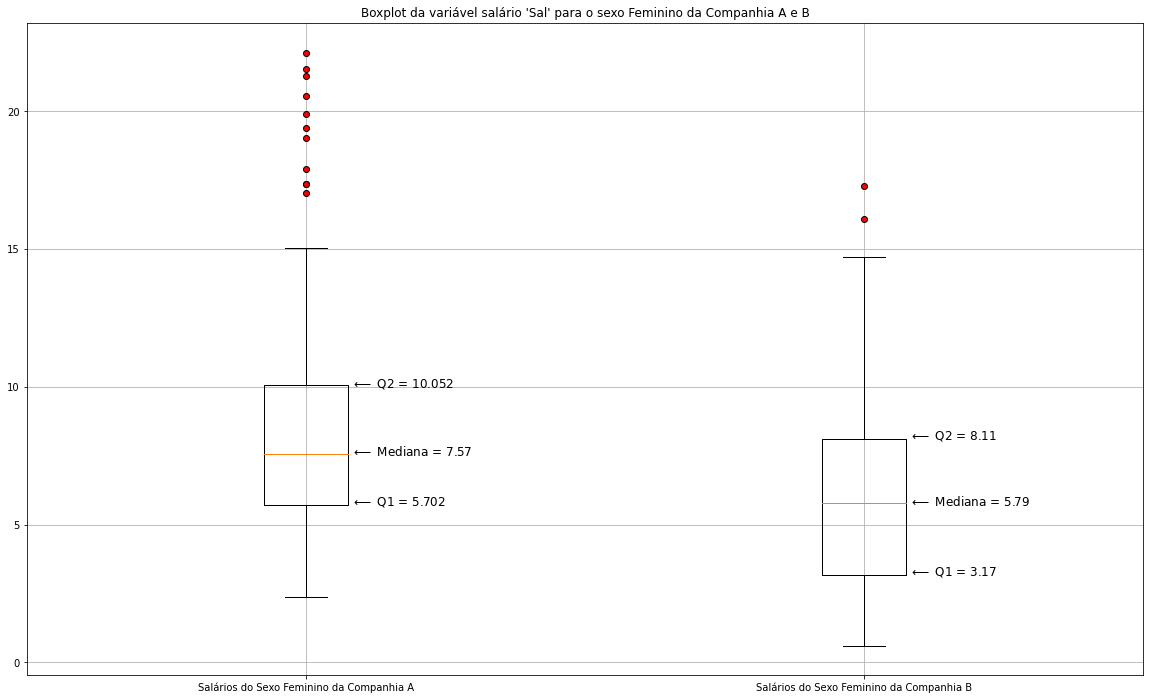

In [291]:
dadosA_fem_sal = dadosA[dadosA['Sexo'] == 'fem'] #separando o df apenas para o sexo feminino
dadosB_fem_sal = dadosB[dadosB['Sexo'] == 'fem'] #separando o df apenas para o sexo feminino
sal_fem = [pd.Series(dadosA_fem_sal['Sal']), pd.Series(dadosB_fem_sal['Sal'])]
sal_fem_labels = ["Salários do Sexo Feminino da Companhia A", "Salários do Sexo Feminino da Companhia B"]

print("Dados Mulheres Comp A:", pd.Series(dadosA_fem_sal['Sal']).describe())
print("Dados Mulheres Comp B:", pd.Series(dadosB_fem_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_fem, flierprops=green_diamond, labels = sal_fem_labels)
plt.title("Boxplot da variável salário 'Sal' para o sexo Feminino da Companhia A e B")
plt.grid()
plt.text(1.08, 7.5, '$\longleftarrow$ Mediana = 7.57', fontsize = 12)
plt.text(1.08, 5.7, '$\longleftarrow$ Q1 = 5.702', fontsize = 12)
plt.text(1.08, 10, '$\longleftarrow$ Q2 = 10.052', fontsize = 12)
#####################################################################
plt.text(2.08, 5.7, '$\longleftarrow$ Mediana = 5.79', fontsize = 12)
plt.text(2.08, 3.17, '$\longleftarrow$ Q1 = 3.17', fontsize = 12)
plt.text(2.08, 8.1, '$\longleftarrow$ Q2 = 8.11', fontsize = 12)
plt.show()

### Salário dos Homens da Companhia A e dos Homens da Companhia B

Dados Homens Comp A: count    142.000000
mean       8.850563
std        6.455005
min        0.560000
25%        4.462500
50%        7.165000
75%        9.440000
max       24.760000
Name: Sal, dtype: float64
Dados Homens Comp B: count    114.000000
mean      10.548860
std        4.412183
min        3.790000
25%        7.792500
50%        9.940000
75%       12.520000
max       23.560000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


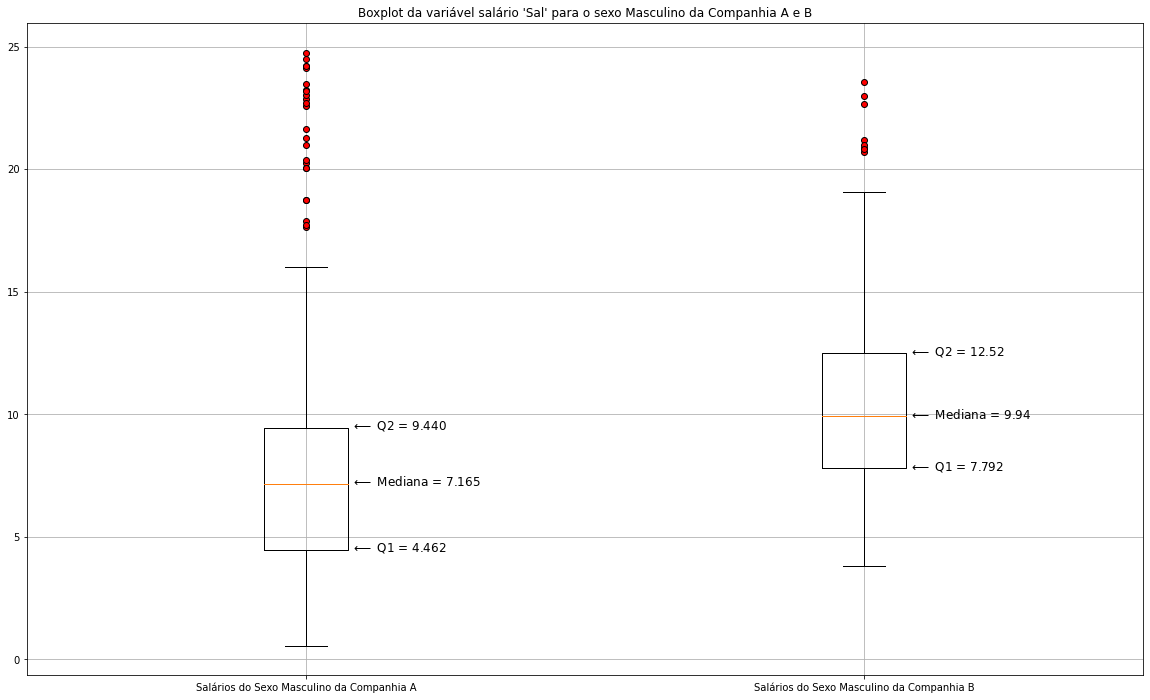

In [292]:
dadosA_masc_sal = dadosA[dadosA['Sexo'] == 'masc'] #separando o df apenas para o sexo feminino
dadosB_masc_sal = dadosB[dadosB['Sexo'] == 'masc'] #separando o df apenas para o sexo feminino
sal_masc = [pd.Series(dadosA_masc_sal['Sal']), pd.Series(dadosB_masc_sal['Sal'])]
sal_masc_labels = ["Salários do Sexo Masculino da Companhia A", "Salários do Sexo Masculino da Companhia B"]

print("Dados Homens Comp A:", pd.Series(dadosA_masc_sal['Sal']).describe())
print("Dados Homens Comp B:", pd.Series(dadosB_masc_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_masc, flierprops=green_diamond, labels = sal_masc_labels)
plt.title("Boxplot da variável salário 'Sal' para o sexo Masculino da Companhia A e B")
plt.grid()
plt.text(1.08, 7.1, '$\longleftarrow$ Mediana = 7.165', fontsize = 12)
plt.text(1.08, 4.4, '$\longleftarrow$ Q1 = 4.462', fontsize = 12)
plt.text(1.08, 9.4, '$\longleftarrow$ Q2 = 9.440', fontsize = 12)
######################################################################
plt.text(2.08, 9.8, '$\longleftarrow$ Mediana = 9.94', fontsize = 12)
plt.text(2.08, 7.7, '$\longleftarrow$ Q1 = 7.792', fontsize = 12)
plt.text(2.08, 12.4, '$\longleftarrow$ Q2 = 12.52', fontsize = 12)
plt.show()

### Salário da Educação Primária da Companhia A e Educação Primária Companhia B

Dados Salário Primário Comp A: count    103.000000
mean       4.769515
std        2.448274
min        0.560000
25%        3.395000
50%        4.540000
75%        5.885000
max       17.380000
Name: Sal, dtype: float64
Dados Salário Primário Comp B: count    97.000000
mean      4.768763
std       2.863894
min       0.610000
25%       2.690000
50%       4.180000
75%       6.870000
max      12.490000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


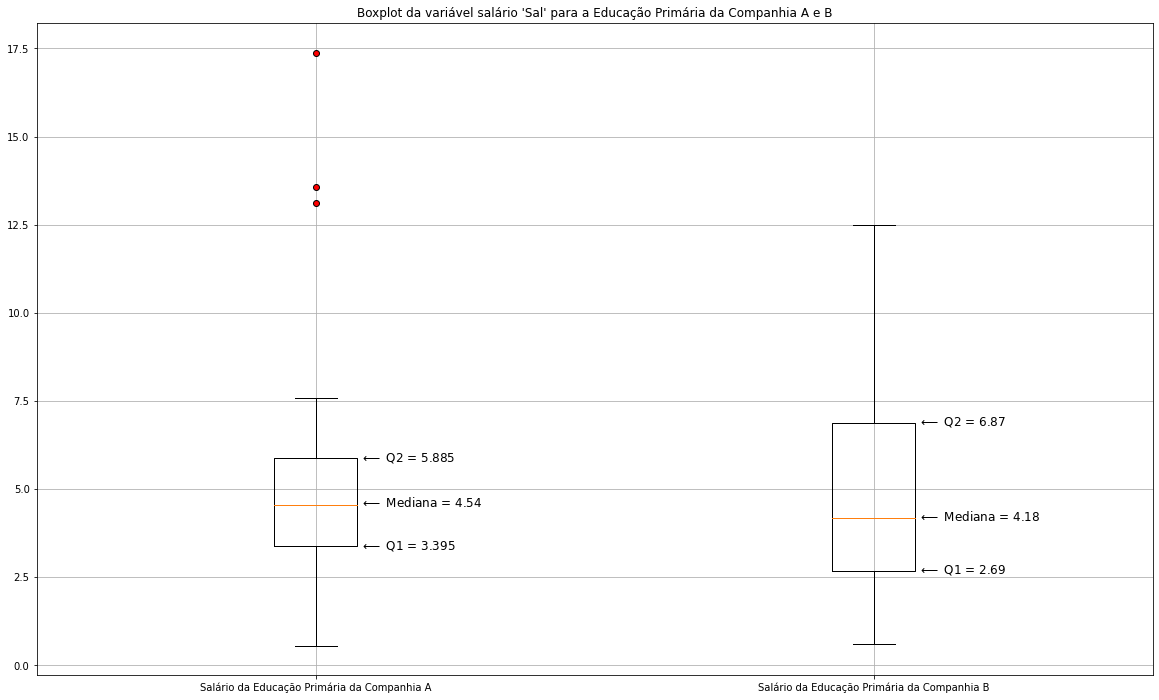

In [293]:
dadosA_prim_sal = dadosA[dadosA['Educ'] == 'prim'] #separando o df apenas para o primário
dadosB_prim_sal = dadosB[dadosB['Educ'] == 'prim'] #separando o df apenas para o primário
sal_prim = [pd.Series(dadosA_prim_sal['Sal']), pd.Series(dadosB_prim_sal['Sal'])]
sal_prim_label = ["Salário da Educação Primária da Companhia A", "Salário da Educação Primária da Companhia B"]

print("Dados Salário Primário Comp A:", pd.Series(dadosA_prim_sal['Sal']).describe())
print("Dados Salário Primário Comp B:", pd.Series(dadosB_prim_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_prim, flierprops=green_diamond, labels = sal_prim_label)
plt.title("Boxplot da variável salário 'Sal' para a Educação Primária da Companhia A e B")
plt.grid()
plt.text(1.08, 4.5, '$\longleftarrow$ Mediana = 4.54', fontsize = 12)
plt.text(1.08, 3.3, '$\longleftarrow$ Q1 = 3.395', fontsize = 12)
plt.text(1.08, 5.8, '$\longleftarrow$ Q2 = 5.885', fontsize = 12)
#####################################################################
plt.text(2.08, 4.1, '$\longleftarrow$ Mediana = 4.18', fontsize = 12)
plt.text(2.08, 2.6, '$\longleftarrow$ Q1 = 2.69', fontsize = 12)
plt.text(2.08, 6.8, '$\longleftarrow$ Q2 = 6.87', fontsize = 12)

plt.show()

### Salário da Educação Secundária da Companhia A e Educação Secundária Companhia B

Dados Salário Secundária Comp A: count    114.000000
mean       9.389474
std        3.266490
min        4.710000
25%        7.397500
50%        8.825000
75%        9.870000
max       20.240000
Name: Sal, dtype: float64
Dados Salário Secundária Comp B: count    127.000000
mean       8.786457
std        2.884778
min        3.230000
25%        6.740000
50%        8.800000
75%       10.745000
max       15.640000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


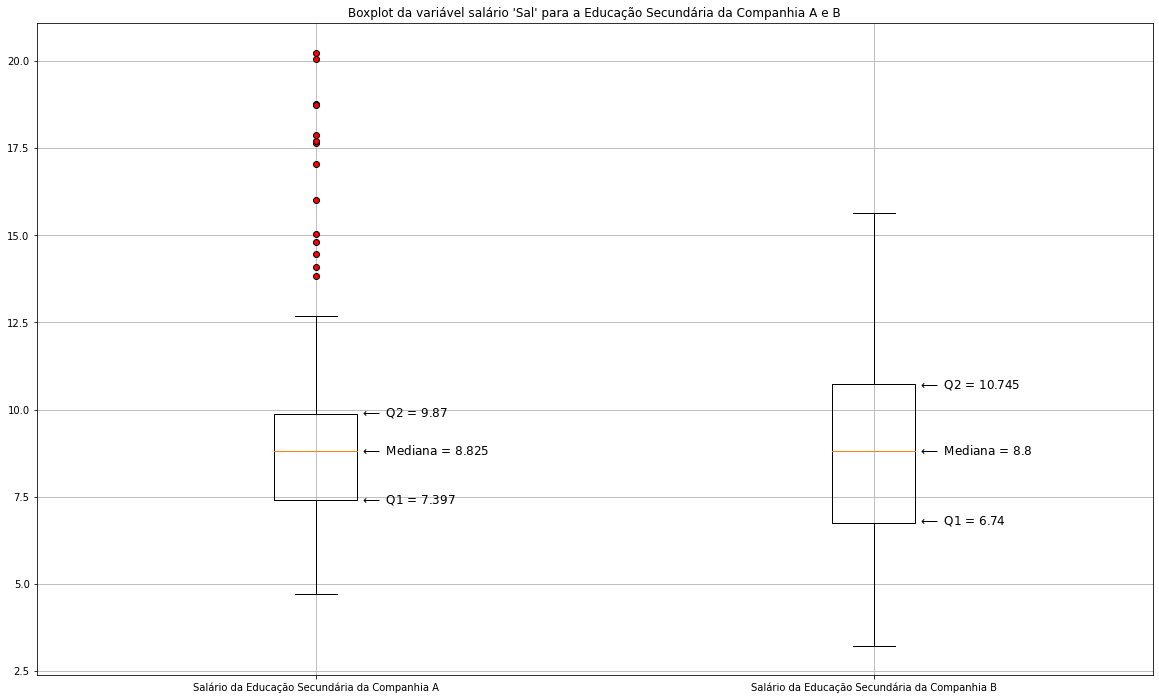

In [294]:
dadosA_sec_sal = dadosA[dadosA['Educ'] == 'sec'] #separando o df apenas para o secundário
dadosB_sec_sal = dadosB[dadosB['Educ'] == 'sec'] #separando o df apenas para o secundário
sal_sec = [pd.Series(dadosA_sec_sal['Sal']), pd.Series(dadosB_sec_sal['Sal'])]
sal_sec_label = ["Salário da Educação Secundária da Companhia A", "Salário da Educação Secundária da Companhia B"]

print("Dados Salário Secundária Comp A:", pd.Series(dadosA_sec_sal['Sal']).describe())
print("Dados Salário Secundária Comp B:", pd.Series(dadosB_sec_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_sec, flierprops=green_diamond, labels = sal_sec_label)
plt.title("Boxplot da variável salário 'Sal' para a Educação Secundária da Companhia A e B")
plt.grid()
plt.text(1.08, 8.7, '$\longleftarrow$ Mediana = 8.825', fontsize = 12)
plt.text(1.08, 7.3, '$\longleftarrow$ Q1 = 7.397', fontsize = 12)
plt.text(1.08, 9.8, '$\longleftarrow$ Q2 = 9.87', fontsize = 12)
######################################################################
plt.text(2.08, 8.7, '$\longleftarrow$ Mediana = 8.8', fontsize = 12)
plt.text(2.08, 6.7, '$\longleftarrow$ Q1 = 6.74', fontsize = 12)
plt.text(2.08, 10.6, '$\longleftarrow$ Q2 = 10.745', fontsize = 12)
plt.show()

### Salário da Educação Terciária da Companhia A e Educação Terciária Companhia B

Dados Salário Terciária Comp A: count    31.000000
mean     20.235161
std       4.120276
min       9.150000
25%      19.225000
50%      21.290000
75%      23.105000
max      24.760000
Name: Sal, dtype: float64
Dados Salário Terciária Comp B: count    33.000000
mean     15.075758
std       4.669740
min       7.560000
25%      11.800000
50%      14.090000
75%      19.060000
max      23.560000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


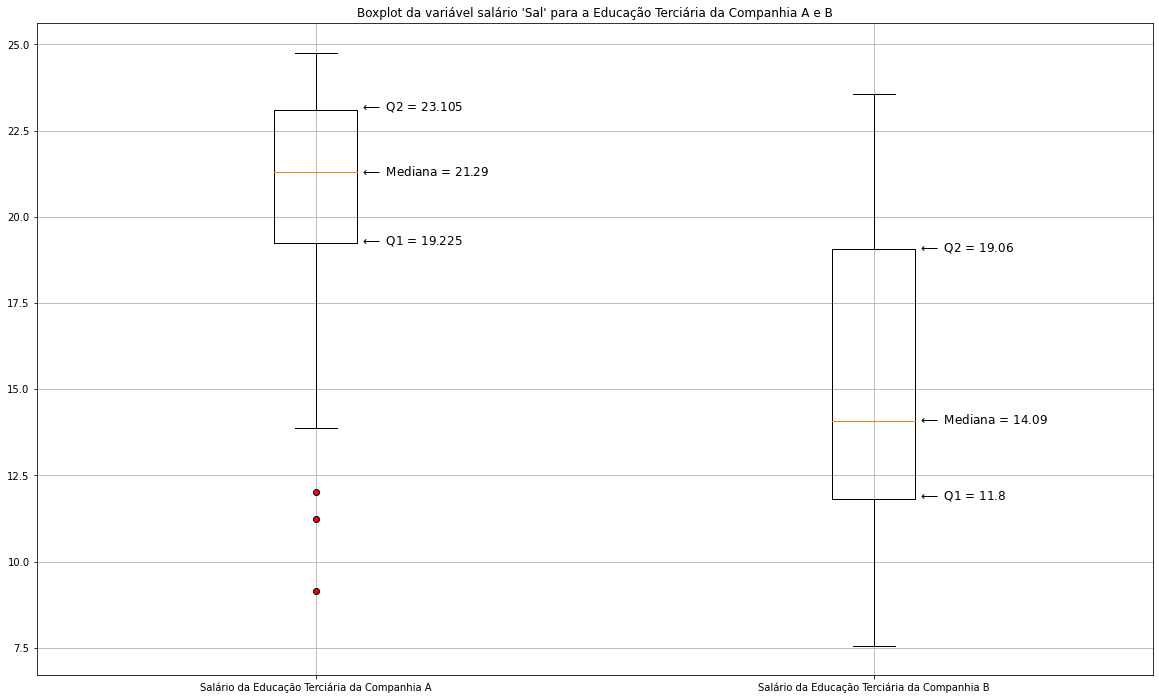

In [295]:
dadosA_terc_sal = dadosA[dadosA['Educ'] == 'terc'] #separando o df apenas para o terciário
dadosB_terc_sal = dadosB[dadosB['Educ'] == 'terc'] #separando o df apenas para o terciário
sal_terc = [pd.Series(dadosA_terc_sal['Sal']), pd.Series(dadosB_terc_sal['Sal'])]
sal_terc_label = ["Salário da Educação Terciária da Companhia A", "Salário da Educação Terciária da Companhia B"]

print("Dados Salário Terciária Comp A:", pd.Series(dadosA_terc_sal['Sal']).describe())
print("Dados Salário Terciária Comp B:", pd.Series(dadosB_terc_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_terc, flierprops=green_diamond, labels = sal_terc_label)
plt.title("Boxplot da variável salário 'Sal' para a Educação Terciária da Companhia A e B")
plt.grid()
plt.text(1.08, 21.2, '$\longleftarrow$ Mediana = 21.29', fontsize = 12)
plt.text(1.08, 19.2, '$\longleftarrow$ Q1 = 19.225', fontsize = 12)
plt.text(1.08, 23.1, '$\longleftarrow$ Q2 = 23.105', fontsize = 12)
######################################################################
plt.text(2.08, 14, '$\longleftarrow$ Mediana = 14.09', fontsize = 12)
plt.text(2.08, 11.8, '$\longleftarrow$ Q1 = 11.8', fontsize = 12)
plt.text(2.08, 19, '$\longleftarrow$ Q2 = 19.06', fontsize = 12)
plt.show()

## $3.ii)$ Utilize intervalos de confiança para comparar os salários das duas companhias para as diferentes categorias de sexo e educação.

### Intervalos de Confiança para os Salários: Companhias A e B

In [296]:
#Intervalo de Confiança: Sexo Masculino
print("Intervalos de Confiança para os Salários de Funcionários do Sexo Masculino:")
salMascA = dadosA.query("Sexo == 'masc'").Sal
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(salMascA)-1, loc=np.mean(salMascA), scale=scipy.stats.sem(salMascA)))
salMascB = dadosB.query("Sexo == 'masc'").Sal
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(salMascB)-1, loc=np.mean(salMascB), scale=scipy.stats.sem(salMascB)))

Intervalos de Confiança para os Salários de Funcionários do Sexo Masculino:
Companhia A:  (7.779675478273895, 9.921451282289478)
Companhia B:  (9.730159129244326, 11.367560169001289)


In [297]:
#Intervalo de Confiança: Sexo Feminino
print("Intervalos de Confiança para os Salários de Funcionários do Sexo Feminino:")
salFemA = dadosA.query("Sexo == 'fem'").Sal
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(salFemA)-1, loc=np.mean(salFemA), scale=scipy.stats.sem(salFemA)))
salFemB = dadosB.query("Sexo == 'fem'").Sal
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(salFemB)-1, loc=np.mean(salFemB), scale=scipy.stats.sem(salFemB)))

Intervalos de Confiança para os Salários de Funcionários do Sexo Feminino:
Companhia A:  (7.909019158286598, 9.679094049260572)
Companhia B:  (5.514971220859486, 6.700133674245416)


In [298]:
#Intervalo de Confiança: Escolaridade Primária
print("Intervalos de Confiança para os Salários de Funcionários com Escolaridade Primária:")
salPrimA = dadosA.query("Educ == 'prim'").Sal
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(salPrimA)-1, loc=np.mean(salPrimA), scale=scipy.stats.sem(salPrimA)))
salPrimB = dadosB.query("Educ == 'prim'").Sal
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(salPrimB)-1, loc=np.mean(salPrimB), scale=scipy.stats.sem(salPrimB))) 

Intervalos de Confiança para os Salários de Funcionários com Escolaridade Primária:
Companhia A:  (4.291024795084898, 5.248004331128694)
Companhia B:  (4.191560484595262, 5.345965288600614)


In [299]:
#Intervalo de Confiança: Escolaridade Secundária
print("Intervalos de Confiança para os Salários de Funcionários com Escolaridade Secundária:")
salSecA = dadosA.query("Educ == 'sec'").Sal
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(salSecA)-1, loc=np.mean(salSecA), scale=scipy.stats.sem(salSecA)))
salSecB = dadosB.query("Educ == 'sec'").Sal
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(salSecB)-1, loc=np.mean(salSecB), scale=scipy.stats.sem(salSecB)))

Intervalos de Confiança para os Salários de Funcionários com Escolaridade Secundária:
Companhia A:  (8.78336172139881, 9.99558564702224)
Companhia B:  (8.279874559345817, 9.293038826480949)


In [300]:
#Intervalo de Confiança: Escolaridade Terciária
print("Intervalos de Confiança para os Salários de Funcionários com Escolaridade Terciária:")
salTercA = dadosA.query("Educ == 'terc'").Sal
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(salTercA)-1, loc=np.mean(salTercA), scale=scipy.stats.sem(salTercA)))
salTercB = dadosB.query("Educ == 'terc'").Sal
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(salTercB)-1, loc=np.mean(salTercB), scale=scipy.stats.sem(salTercB)))

Intervalos de Confiança para os Salários de Funcionários com Escolaridade Terciária:
Companhia A:  (18.72383193404335, 21.746490646601817)
Companhia B:  (13.419939637185301, 16.731575514329844)


## $3.iv)$ Compare a diferença salarial entre homens e mulheres em cada companhia (use boxplots).

### Salário das Mulheres da Companhia A e dos Homens da Companhia A

Dados Mulheres Comp A: count    106.000000
mean       8.794057
std        4.595495
min        2.370000
25%        5.702500
50%        7.570000
75%       10.052500
max       22.130000
Name: Sal, dtype: float64
Dados Homens Comp A: count    142.000000
mean       8.850563
std        6.455005
min        0.560000
25%        4.462500
50%        7.165000
75%        9.440000
max       24.760000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


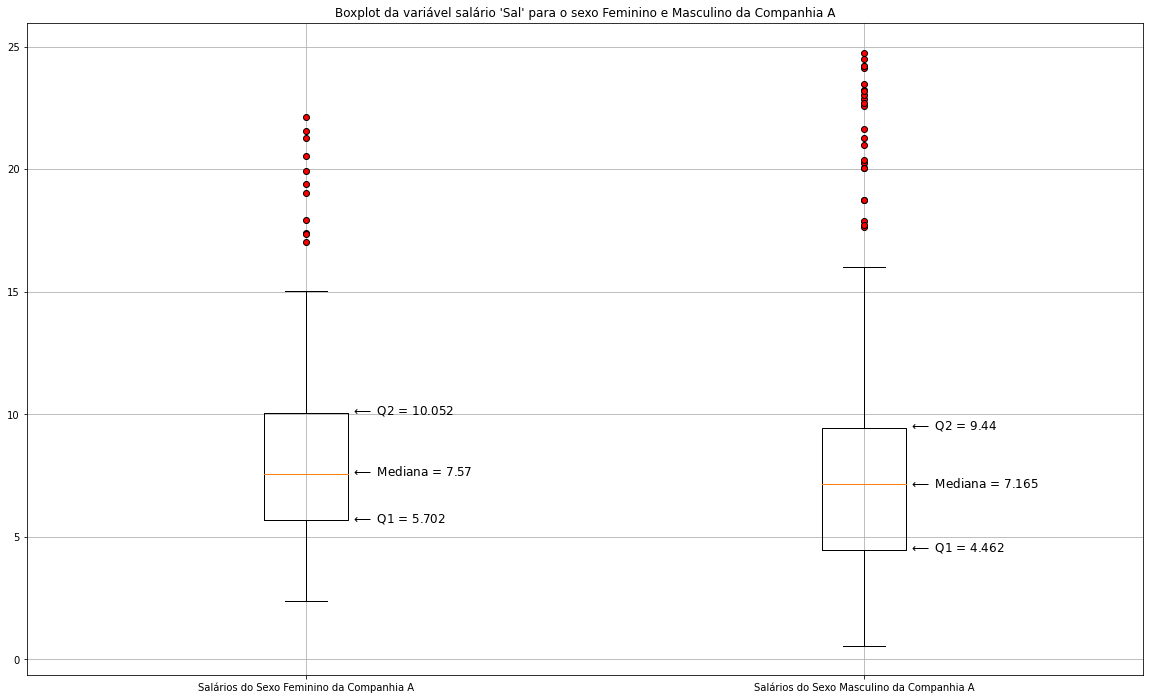

In [301]:
dadosA_fem_sal = dadosA[dadosA['Sexo'] == 'fem'] #separando o df apenas para o sexo feminino
dadosA_masc_sal = dadosA[dadosA['Sexo'] == 'masc'] #separando o df apenas para o sexo masculino
sal_fem_masc_A = [pd.Series(dadosA_fem_sal['Sal']), pd.Series(dadosA_masc_sal['Sal'])]
sal_fem_masc_A_labels = ["Salários do Sexo Feminino da Companhia A", "Salários do Sexo Masculino da Companhia A"]

print("Dados Mulheres Comp A:", pd.Series(dadosA_fem_sal['Sal']).describe())
print("Dados Homens Comp A:", pd.Series(dadosA_masc_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_fem_masc_A, flierprops=green_diamond, labels = sal_fem_masc_A_labels)
plt.title("Boxplot da variável salário 'Sal' para o sexo Feminino e Masculino da Companhia A")
plt.grid()
plt.text(1.08, 7.5, '$\longleftarrow$ Mediana = 7.57', fontsize = 12)
plt.text(1.08, 5.6, '$\longleftarrow$ Q1 = 5.702', fontsize = 12)
plt.text(1.08, 10, '$\longleftarrow$ Q2 = 10.052', fontsize = 12)
######################################################################
plt.text(2.08, 7, '$\longleftarrow$ Mediana = 7.165', fontsize = 12)
plt.text(2.08, 4.4, '$\longleftarrow$ Q1 = 4.462', fontsize = 12)
plt.text(2.08, 9.4, '$\longleftarrow$ Q2 = 9.44', fontsize = 12)
plt.show()

### Salário das Mulheres da Companhia B e dos Homens da Companhia B

Dados Mulheres Comp B: count    143.000000
mean       6.107552
std        3.584683
min        0.610000
25%        3.170000
50%        5.790000
75%        8.115000
max       17.280000
Name: Sal, dtype: float64
Dados Homens Comp B: count    114.000000
mean      10.548860
std        4.412183
min        3.790000
25%        7.792500
50%        9.940000
75%       12.520000
max       23.560000
Name: Sal, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


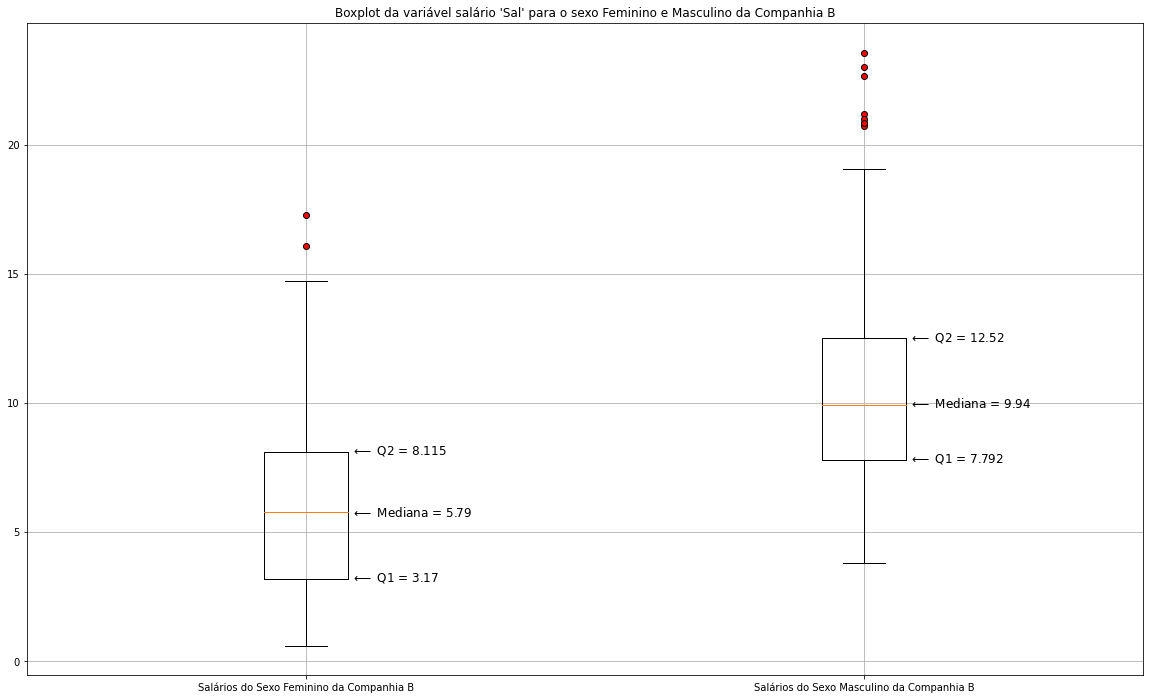

In [302]:
dadosB_fem_sal = dadosB[dadosB['Sexo'] == 'fem'] #separando o df apenas para o sexo feminino
dadosB_masc_sal = dadosB[dadosB['Sexo'] == 'masc'] #separando o df apenas para o sexo masculino
sal_fem_masc_B = [pd.Series(dadosB_fem_sal['Sal']), pd.Series(dadosB_masc_sal['Sal'])]
sal_fem_masc_B_labels = ["Salários do Sexo Feminino da Companhia B", "Salários do Sexo Masculino da Companhia B"]

print("Dados Mulheres Comp B:", pd.Series(dadosB_fem_sal['Sal']).describe())
print("Dados Homens Comp B:", pd.Series(dadosB_masc_sal['Sal']).describe())

green_diamond = dict(markerfacecolor='r', marker='o')
plt.figure(figsize=(20, 12))
plt.boxplot(sal_fem_masc_B, flierprops=green_diamond, labels = sal_fem_masc_B_labels)
plt.title("Boxplot da variável salário 'Sal' para o sexo Feminino e Masculino da Companhia B")
plt.grid()
plt.text(1.08, 5.6, '$\longleftarrow$ Mediana = 5.79', fontsize = 12)
plt.text(1.08, 3.1, '$\longleftarrow$ Q1 = 3.17', fontsize = 12)
plt.text(1.08, 8, '$\longleftarrow$ Q2 = 8.115', fontsize = 12)
######################################################################
plt.text(2.08, 9.8, '$\longleftarrow$ Mediana = 9.94', fontsize = 12)
plt.text(2.08, 7.7, '$\longleftarrow$ Q1 = 7.792', fontsize = 12)
plt.text(2.08, 12.4, '$\longleftarrow$ Q2 = 12.52', fontsize = 12)
plt.show()

## $3.v)$ Compare a diferença salarial entre homens e mulheres em cada companhia com teste de hipóteses.

### Companhia A

In [303]:
sub_fora_A = dadosA.Sal #todos os salários, independente do sexo
sub_dentro_Amasc = dadosA[dadosA['Sexo'] == 'masc'].Sal #salários de homens (vamos ver se há influência)

hip_test(sub_fora_A, sub_dentro_Amasc)

* Mann-Whitney:
     -> mannwhitneyu: U-statistic = 18329.000000	p_value = 0.501187
     -> ranksums: U-statistic = 0.673081	p_value = 0.500896

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 0.7661683804306618


Não há significância estatística para rejeitar a hipótese nula


In [304]:
sub_fora_A = dadosA.Sal #todos os salários, independente do sexo
sub_dentro_Afem = dadosA[dadosA['Sexo'] == 'fem'].Sal #salários de mulheres (vamos ver se há influência)

hip_test(sub_fora_A, sub_dentro_Afem)

* Mann-Whitney:
     -> mannwhitneyu: U-statistic = 12423.000000	p_value = 0.413913
     -> ranksums: U-statistic = -0.817585	p_value = 0.413594

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 0.5326906011770652


Não há significância estatística para rejeitar a hipótese nula


### Companhia B

In [305]:
sub_fora_B = dadosB.Sal #todos os salários, independente do sexo
sub_dentro_Bmasc = dadosB[dadosB['Sexo'] == 'masc'].Sal #salários de homens (vamos ver se há influência)

hip_test(sub_fora_B, sub_dentro_Bmasc)

* Mann-Whitney:
     -> mannwhitneyu: U-statistic = 9890.000000	p_value = 0.000001
     -> ranksums: U-statistic = -4.993624	p_value = 0.000001

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 1.2974658015973972e-05


* Possível rejeitar a hipótese nula de acordo com: 
  - Mann-Whitney-U Test: 
     -> mannwhitneyu
     -> ranksums
  - Two Sampe Kolmogorov-Smirnov Test


In [306]:
sub_fora_B = dadosB.Sal #todos os salários, independente do sexo
sub_dentro_Bfem = dadosB[dadosB['Sexo'] == 'fem'].Sal #salários de mulheres (vamos ver se há influência)

hip_test(sub_fora_B, sub_dentro_Bfem)

* Mann-Whitney:
     -> mannwhitneyu: U-statistic = 23134.500000	p_value = 0.000018
     -> ranksums: U-statistic = 4.294371	p_value = 0.000018

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 0.00030348525039980423


* Possível rejeitar a hipótese nula de acordo com: 
  - Mann-Whitney-U Test: 
     -> mannwhitneyu
     -> ranksums
  - Two Sampe Kolmogorov-Smirnov Test


## $3.vi)$ Compare a participação de mulheres em cargos gerenciais nas duas companhias usando intervalos de confiança.

### Intervalos de Confiança para Mulheres em Cargos Gerenciais: Companhias A e B



In [307]:
#Intervalo de Confiança: Sexo Feminino em Cargo Gerencial na Companhia A
print("Intervalos de Confiança para a Participação de Funcionários do Sexo Feminino em Cargos Gerenciais na Companhia A:\n(1, se é mulher e atua em cargo gerencial; 0, caso contrário.)")
femGerA = dadosA.query("Sexo == 'fem' and cargo == 'gerencial'")
distribuicaoA = [0]*(dadosA.shape[0] - femGerA.shape[0]) + [1]*(femGerA.shape[0])
print("Companhia A: ", scipy.stats.t.interval(alpha=0.95, df=len(distribuicaoA)-1, loc=np.mean(distribuicaoA), scale=scipy.stats.sem(distribuicaoA)))
print("")
#Intervalo de Confiança: Sexo Feminino em Cargo Gerencial na Companhia B
print("Intervalos de Confiança para a Participação de Funcionários do Sexo Feminino em Cargos Gerenciais na Companhia B:\n(1, se é mulher e atua em cargo gerencial; 0, caso contrário.)")
femGerB = dadosB.query("Sexo == 'fem' and cargo == 'gerencial'")
distribuicaoB = [0]*(dadosB.shape[0] - femGerB.shape[0]) + [1]*(femGerB.shape[0])
print("Companhia B: ", scipy.stats.t.interval(alpha=0.95, df=len(distribuicaoB)-1, loc=np.mean(distribuicaoB), scale=scipy.stats.sem(distribuicaoB)))

Intervalos de Confiança para a Participação de Funcionários do Sexo Feminino em Cargos Gerenciais na Companhia A:
(1, se é mulher e atua em cargo gerencial; 0, caso contrário.)
Companhia A:  (0.033727871161186244, 0.09530438690332987)

Intervalos de Confiança para a Participação de Funcionários do Sexo Feminino em Cargos Gerenciais na Companhia B:
(1, se é mulher e atua em cargo gerencial; 0, caso contrário.)
Companhia B:  (0.05436038456476303, 0.124627942283486)


## $3.vii)$ Compare a participação de mulheres em cargos gerenciais nas duas companhias usando teste de hipótese.

### Companhia A

In [308]:
sub_fora_Acargos = dadosA[dadosA['cargo'] == 'gerencial'].cargo #todos os cargos gerenciais, independente do sexo

sub_dentro_Acargosfem = dadosA[dadosA['cargo'] == 'gerencial']
sub_dentro_Acargosfem = sub_dentro_Acargosfem[sub_dentro_Acargosfem['Sexo'] == 'fem'].cargo #cagos de mulheres gerentes (vamos ver se há influência)
#sub_dentro_Acargosfem

hip_test(sub_fora_Acargos, sub_dentro_Acargosfem)

* Mann-Whitney:
     -> ValueError: Todos os números são idênticos no teste de mannwhitneyu, então o desconsideraremos
     -> ranksums: U-statistic = 0.000000	p_value = 1.000000

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 1.0


Não há significância estatística para rejeitar a hipótese nula


### Companhia B

In [309]:
sub_fora_Bcargos = dadosB[dadosB['cargo'] == 'gerencial'].cargo #todos os cargos gerenciais, independente do sexo

sub_dentro_Bcargosfem = dadosB[dadosB['cargo'] == 'gerencial']
sub_dentro_Bcargosfem = sub_dentro_Bcargosfem[sub_dentro_Bcargosfem['Sexo'] == 'fem'].cargo #cagos de mulheres gerentes (vamos ver se há influência)

hip_test(sub_fora_Acargos, sub_dentro_Acargosfem)

* Mann-Whitney:
     -> ValueError: Todos os números são idênticos no teste de mannwhitneyu, então o desconsideraremos
     -> ranksums: U-statistic = 0.000000	p_value = 1.000000

* Two Sample Kolmogorov-Smirnov:
     -> p_value = 1.0


Não há significância estatística para rejeitar a hipótese nula
